In [230]:
#KSHITHIJ D SHETTY
#21BDS0226
#GitHub Link : https://github.com/KSHITHIJ2003/EDA_21BDS0226
#Colab Link : https://colab.research.google.com/drive/12ZX-X0hqerTIYwmtst0Crj4ecbK6jZy-#scrollTo=Zm_9yrDxsrRb
#Dataset : constituents.csv
#Dataset url : "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"

# **MOD1 : LOADING THE DATASET , PRE-PROCESSING &  ANALYSIS**

**1.1 Loading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
Kdf = pd.read_csv(url)

# Saving it as a CSV file locally
Kdf.to_csv("constituents.csv", index=False)


In [ ]:
Kdf.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

**1.2 Data Pre-processing**

In [ ]:
#Correcting the founded column

import re

# Function to extract the first 4-digit number (year)
def extract_first_year(value):
    years = re.findall(r'\d{4}', str(value))
    return int(years[0]) if years else None

# Apply the function to the 'Founded' column
Kdf['Founded'] = Kdf['Founded'].apply(extract_first_year)

# Display the updated DataFrame
Kdf.head()



Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK  Founded  
0    66740     1902  
1    91142     1916  
2     1800     1888  
3  1551152     2013  
4  1467373     1989

In [ ]:
#Spliting the Headquater into city and country

Kdf[['City', 'Location']] = Kdf['Headquarters Location'].str.split(',', n=1, expand=True)

# Remove extra spaces (especially before Country)
Kdf['City'] = Kdf['City'].str.strip()
Kdf['Location'] = Kdf['Location'].str.strip()

# Display the new columns
Kdf[['Headquarters Location', 'City', 'Location']].head()


Headquarters Location           City   Location
0    Saint Paul, Minnesota     Saint Paul  Minnesota
1     Milwaukee, Wisconsin      Milwaukee  Wisconsin
2  North Chicago, Illinois  North Chicago   Illinois
3  North Chicago, Illinois  North Chicago   Illinois
4          Dublin, Ireland         Dublin    Ireland

In [ ]:
# Drop the 'Headquarters' column
Kdf.drop('Headquarters Location', axis=1, inplace=True)
Kdf.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry  Date added      CIK  Founded  \
0        Industrial Conglomerates  1957-03-04    66740     1902   
1               Building Products  2017-07-26    91142     1916   
2           Health Care Equipment  1957-03-04     1800     1888   
3                   Biotechnology  2012-12-31  1551152     2013   
4  IT Consulting & Other Services  2011-07-06  1467373     1989   

            City   Location  
0     Saint Paul  Minnesota  
1      Milwaukee  Wisconsin  
2  North Chicago   Illinois  
3  North Chicago   Illinois  
4         Dublin    Ireland

In [ ]:
#Checking for missing values
Kdf.isnull().any()

Symbol               False
Security             False
GICS Sector          False
GICS Sub-Industry    False
Date added           False
CIK                  False
Founded              False
City                 False
Location             False
dtype: bool

In [ ]:
Kdf.dtypes

Symbol               object
Security             object
GICS Sector          object
GICS Sub-Industry    object
Date added           object
CIK                   int64
Founded               int64
City                 object
Location             object
dtype: object

In [ ]:
#Convert Date added to date time and Founded to integer
# Convert 'Date added' to datetime format
Kdf['Date added'] = pd.to_datetime(Kdf['Date added'], errors='coerce')

# Convert 'Founded' to integer
Kdf['Founded'] = Kdf['Founded'].astype(int)

# Check the result
Kdf[['Date added', 'Founded']].dtypes


Date added    datetime64[ns]
Founded                int64
dtype: object

In [ ]:
Kdf.dtypes

Symbol                       object
Security                     object
GICS Sector                  object
GICS Sub-Industry            object
Date added           datetime64[ns]
CIK                           int64
Founded                       int64
City                         object
Location                     object
dtype: object

**1.3 Exploration and summary**

In [ ]:
print(Kdf.shape)


(503, 9)


In [ ]:
print(Kdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Symbol             503 non-null    object        
 1   Security           503 non-null    object        
 2   GICS Sector        503 non-null    object        
 3   GICS Sub-Industry  503 non-null    object        
 4   Date added         503 non-null    datetime64[ns]
 5   CIK                503 non-null    int64         
 6   Founded            503 non-null    int64         
 7   City               503 non-null    object        
 8   Location           503 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 35.5+ KB
None


In [ ]:
Kdf.describe()

Date added           CIK      Founded
count                            503  5.030000e+02   503.000000
mean   2001-06-01 20:13:50.218687872  8.217536e+05  1955.737575
min              1957-03-04 00:00:00  1.800000e+03  1784.000000
25%              1992-08-16 00:00:00  1.005050e+05  1920.000000
50%              2008-03-31 00:00:00  9.000750e+05  1971.000000
75%              2017-03-16 12:00:00  1.175188e+06  1994.000000
max              2024-07-08 00:00:00  2.005951e+06  2024.000000
std                              NaN  5.665200e+05    48.748713

# **2. Univariate Analysis**

**2.1 Histogram**

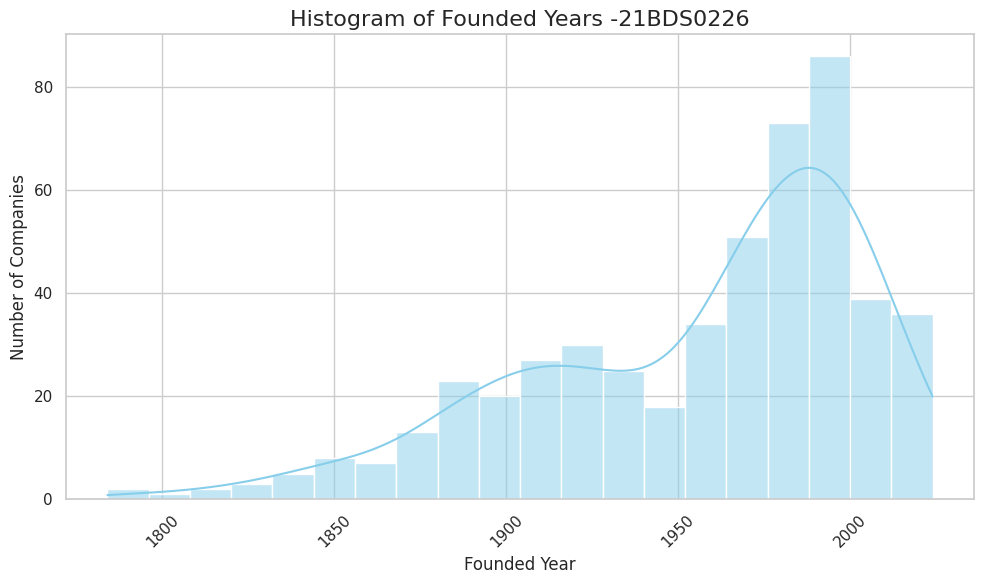

In [ ]:
# Setting the plot style
sns.set(style="whitegrid")

# Creating a histogram
plt.figure(figsize=(10, 6))
sns.histplot(Kdf['Founded'].dropna(), bins=20, kde=True, color='skyblue')

plt.title('Histogram of Founded Years -21BDS0226', fontsize=16)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2.2 Density plot**

<ipython-input-106-3ebfe24e9438>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Kdf['Founded'].dropna(), shade=True, color='purple')


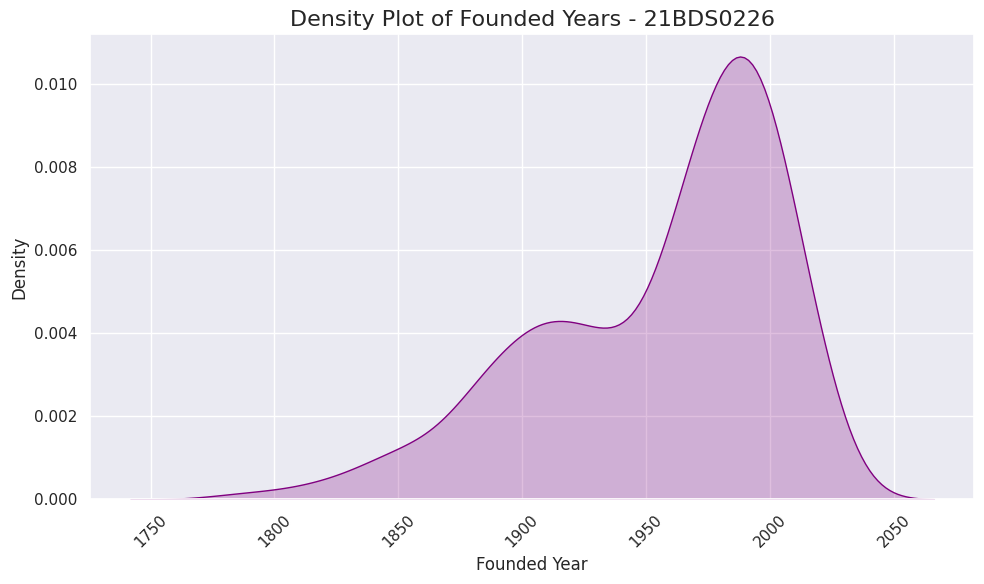

In [ ]:
sns.set(style="darkgrid")

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(Kdf['Founded'].dropna(), shade=True, color='purple')

plt.title('Density Plot of Founded Years - 21BDS0226', fontsize=16)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


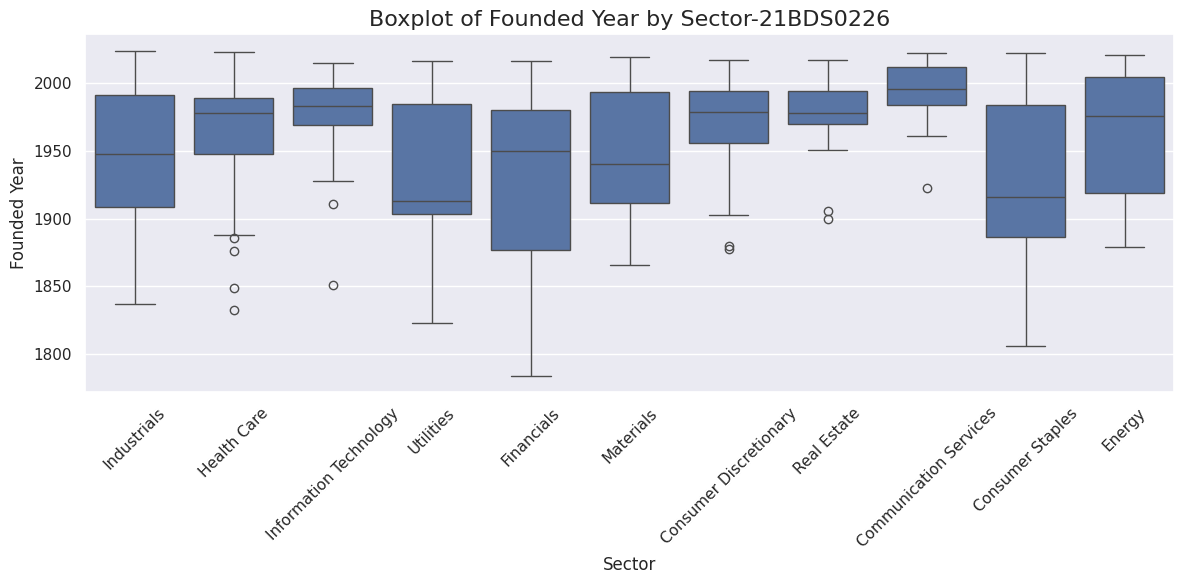

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Kdf, x='GICS Sector', y='Founded')
plt.title('Boxplot of Founded Year by Sector-21BDS0226', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Founded Year')
plt.tight_layout()
plt.show()


**2.4 Barplot**

<ipython-input-108-1aa9bc8b64cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Kdf, x='GICS Sector', order=Kdf['GICS Sector'].value_counts().index, palette='viridis')


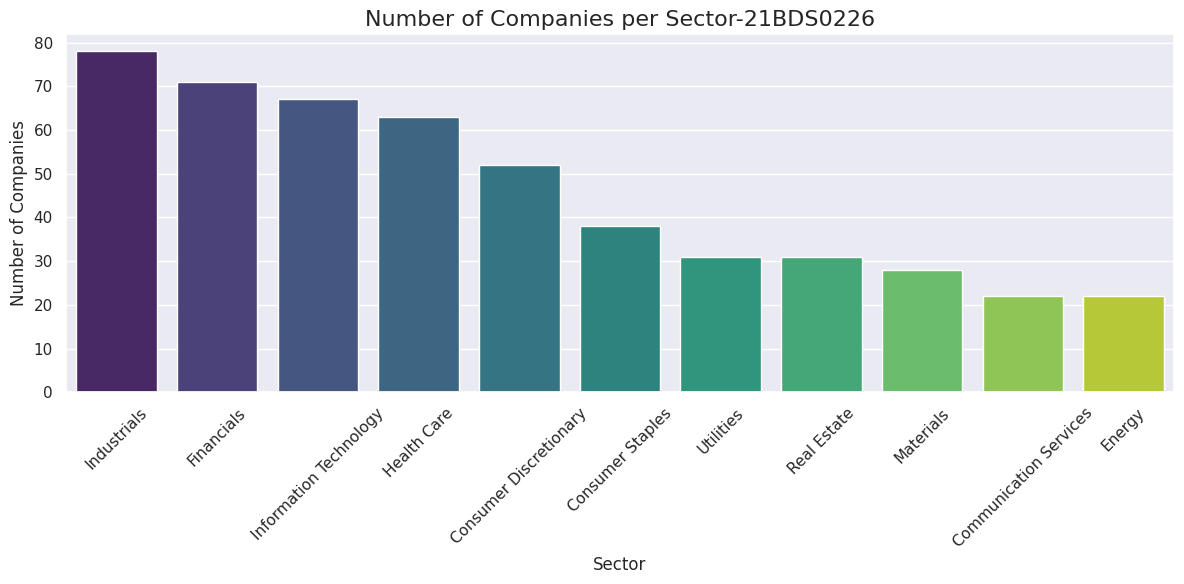

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Kdf, x='GICS Sector', order=Kdf['GICS Sector'].value_counts().index, palette='viridis')

plt.title('Number of Companies per Sector-21BDS0226', fontsize=16)
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.5 STACKED BARPLOT

<ipython-input-112-2c051e45fc5f>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


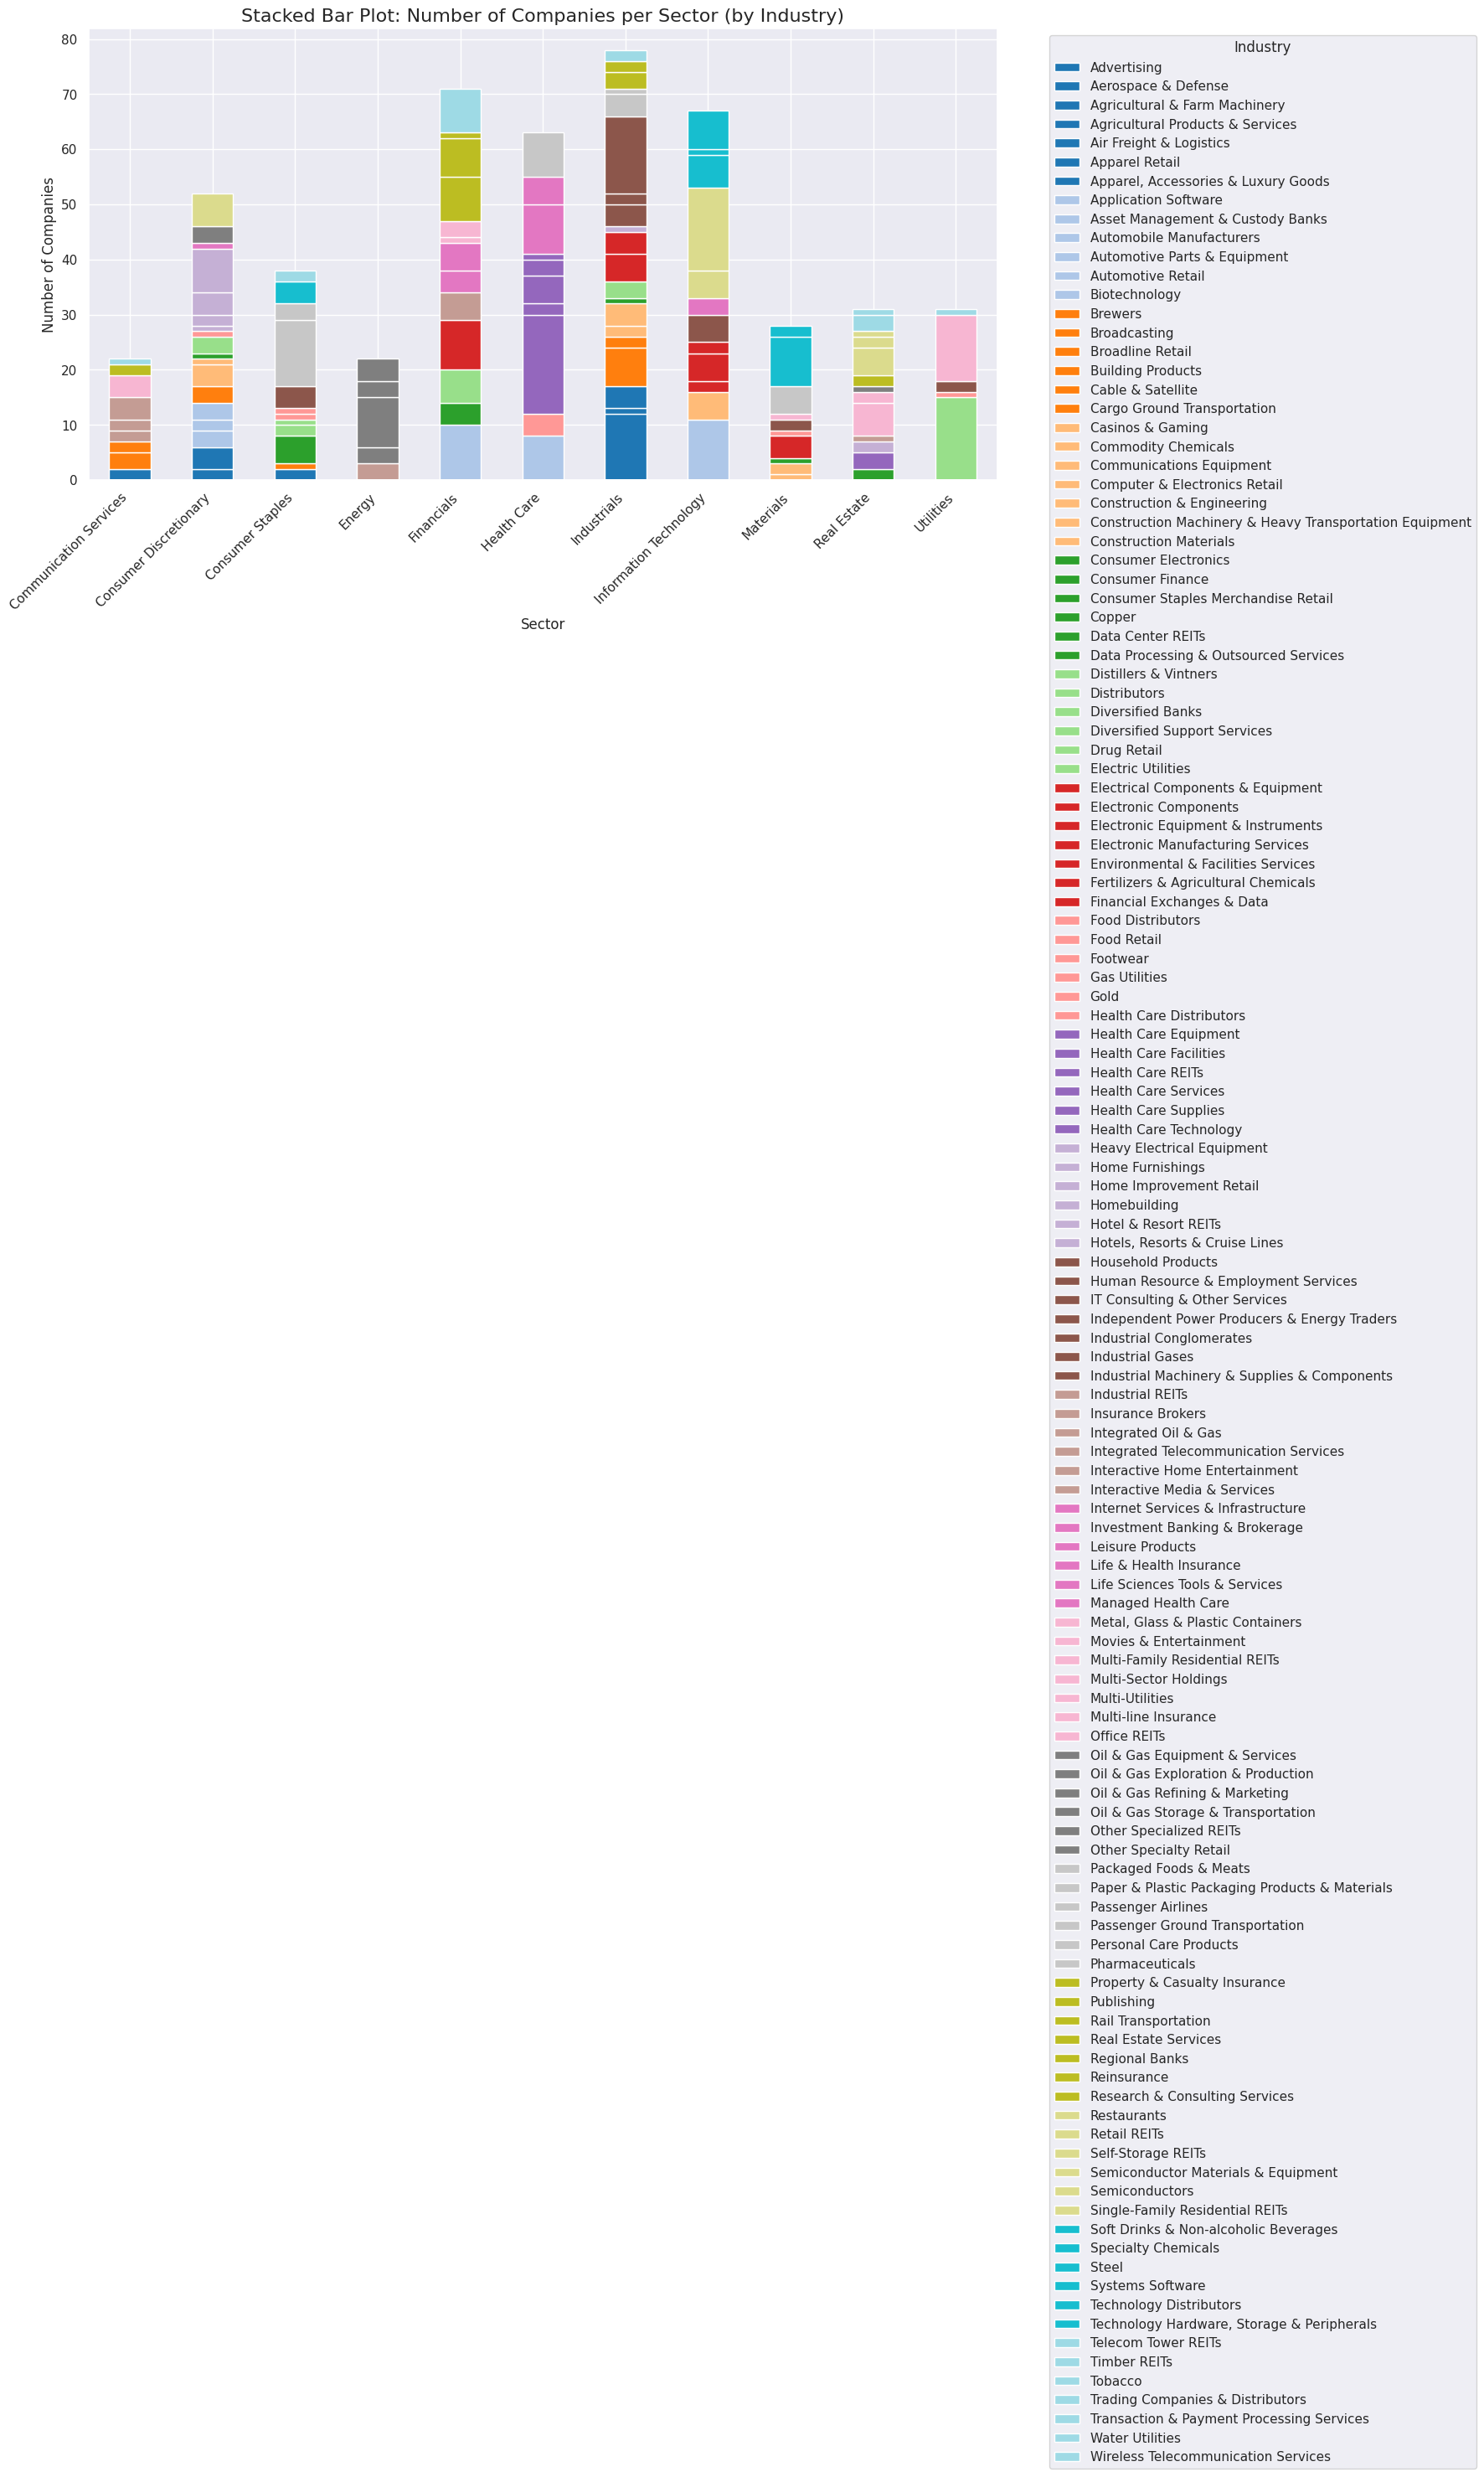

In [ ]:
import matplotlib.pyplot as plt

# Create a crosstab of Sector vs Industry
stack_data = pd.crosstab(Kdf['GICS Sector'], Kdf['GICS Sub-Industry'])

# Plot the stacked bar chart
stack_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Stacked Bar Plot: Number of Companies per Sector (by Industry)', fontsize=16)
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


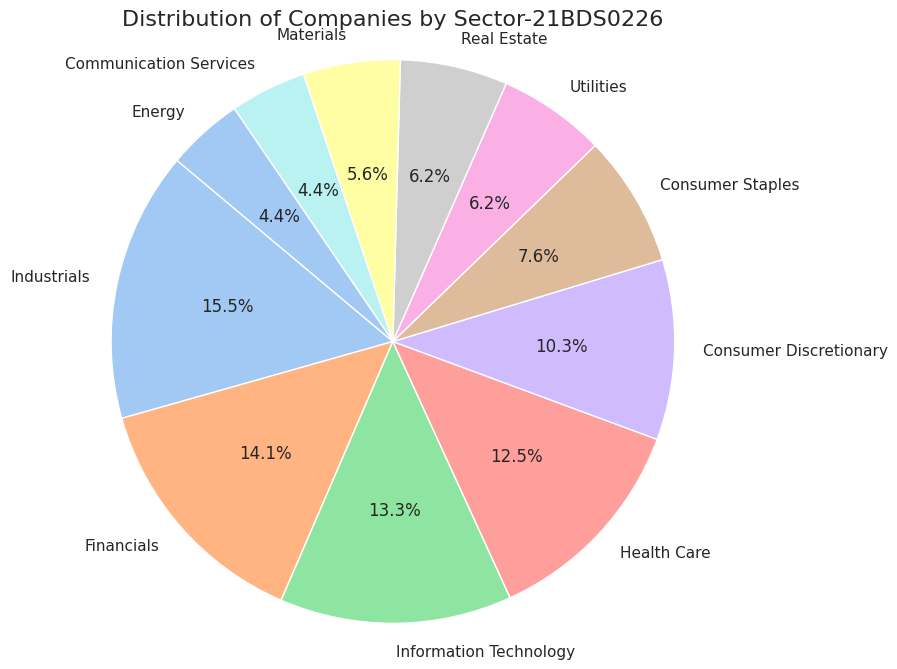

In [ ]:
# Counting companies per sector
sector_counts = Kdf['GICS Sector'].value_counts()

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Companies by Sector-21BDS0226', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


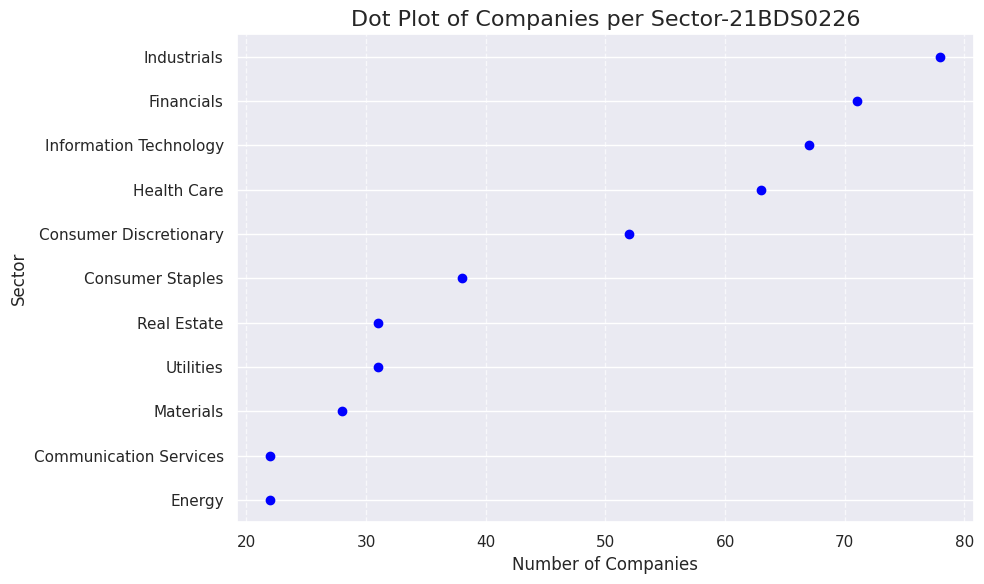

In [ ]:
sector_counts = Kdf['GICS Sector'].value_counts().sort_values()

# dot plot
plt.figure(figsize=(10, 6))
plt.plot(sector_counts.values, sector_counts.index, 'o', color='blue')  # dots
plt.title('Dot Plot of Companies per Sector-21BDS0226', fontsize=16)
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **3. BIVARIATE ANALYSIS**

**3.1 Contigency Table**

In [ ]:
# Contingency table between Sector and Industry
contingency_table = pd.crosstab(Kdf['GICS Sector'], Kdf['GICS Sub-Industry'])

contingency_table


GICS Sub-Industry       Advertising  Aerospace & Defense  \
GICS Sector                                                
Communication Services            2                    0   
Consumer Discretionary            0                    0   
Consumer Staples                  0                    0   
Energy                            0                    0   
Financials                        0                    0   
Health Care                       0                    0   
Industrials                       0                   12   
Information Technology            0                    0   
Materials                         0                    0   
Real Estate                       0                    0   
Utilities                         0                    0   

GICS Sub-Industry       Agricultural & Farm Machinery  \
GICS Sector                                             
Communication Services                              0   
Consumer Discretionary                              0   
Consumer Staples                                    0   
Energy                                              0   
Financials                                          0   
Health Care                                         0   
Industrials                                         1   
Information Technology                              0   
Materials                                           0   
Real Estate                                         0   
Utilities                                           0   

GICS Sub-Industry       Agricultural Products & Services  \
GICS Sector                                                
Communication Services                                 0   
Consumer Discretionary                                 0   
Consumer Staples                                       2   
Energy                                                 0   
Financials                                             0   
Health Care                                            0   
Industrials                                            0   
Information Technology                                 0   
Materials                                              0   
Real Estate                                            0   
Utilities                                              0   

GICS Sub-Industry       Air Freight & Logistics  Apparel Retail  \
GICS Sector                                                       
Communication Services                        0               0   
Consumer Discretionary                        0               2   
Consumer Staples                              0               0   
Energy                                        0               0   
Financials                                    0               0   
Health Care                                   0               0   
Industrials                                   4               0   
Information Technology                        0               0   
Materials                                     0               0   
Real Estate                                   0               0   
Utilities                                     0               0   

GICS Sub-Industry       Apparel, Accessories & Luxury Goods  \
GICS Sector                                                   
Communication Services                                    0   
Consumer Discretionary                                    4   
Consumer Staples                                          0   
Energy                                                    0   
Financials                                                0   
Health Care                                               0   
Industrials                                               0   
Information Technology                                    0   
Materials                                                 0   
Real Estate                                               0   
Utilities                                                 0   

GICS

3.2 Stacked Bar plot

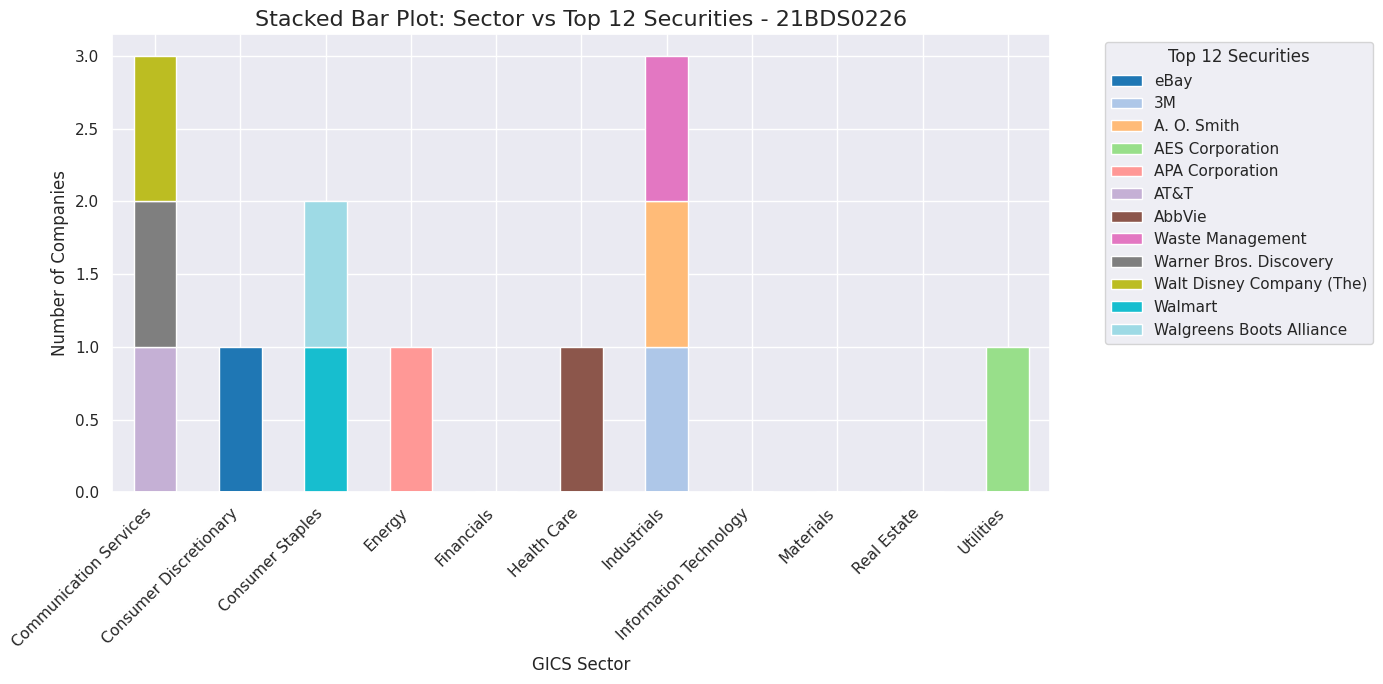

In [ ]:
contingency_table1 = pd.crosstab(Kdf['GICS Sector'], Kdf['Security'])
#Since the chart becomes too complex , so I am just taking top 12
# Get top 12 securities by total count
top_12_securities = contingency_table1.sum().sort_values(ascending=False).head(12).index

# Filter only top 12 securities
contingency_table_top12 = contingency_table1[top_12_securities]

# Plot
contingency_table_top12.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Stacked Bar Plot: Sector vs Top 12 Securities - 21BDS0226', fontsize=16)
plt.xlabel('GICS Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top 12 Securities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


3.3 GROUP BAR CHART

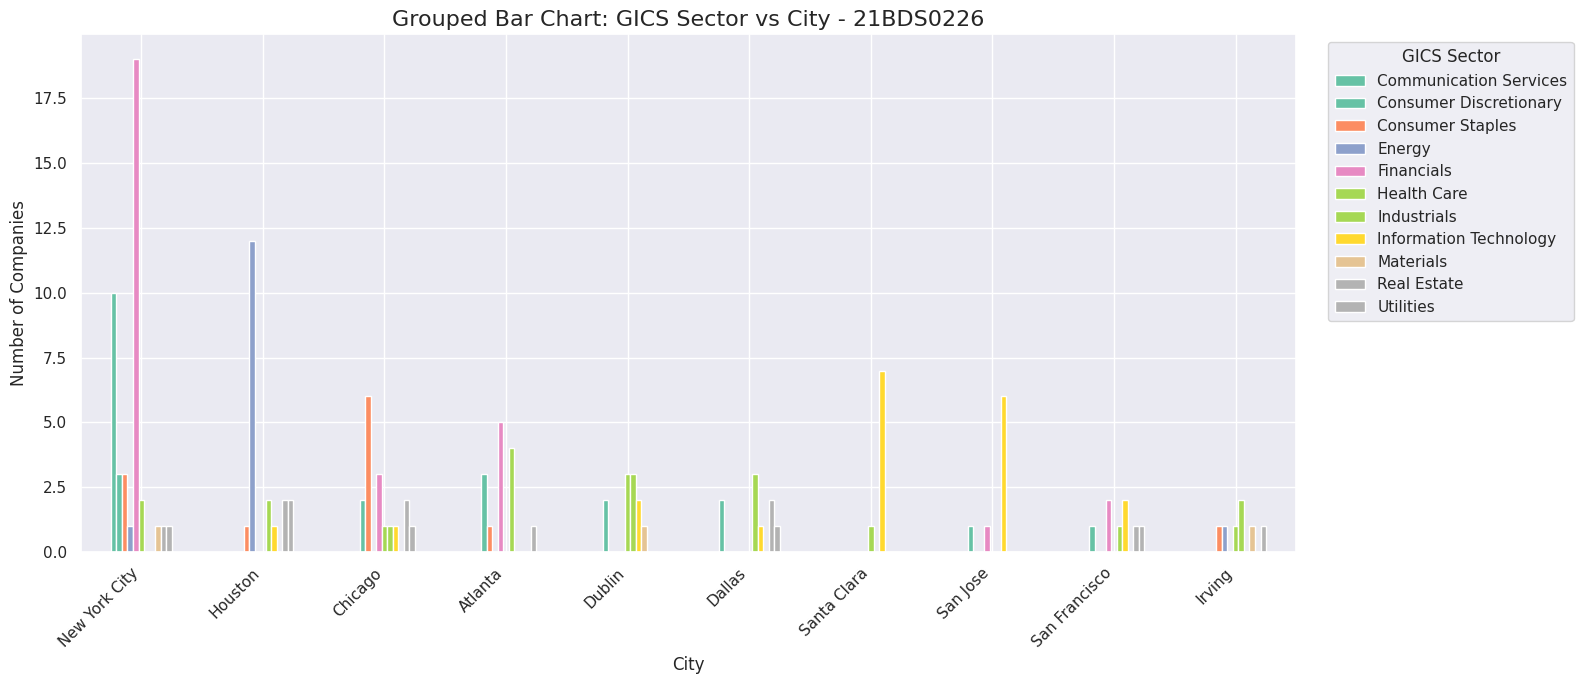

In [ ]:
# Create contingency table of City vs GICS Sector
sector_city_table = pd.crosstab(Kdf['City'], Kdf['GICS Sector'])

# Optional: Limit to top 10 cities by total company count
top_cities = sector_city_table.sum(axis=1).sort_values(ascending=False).head(10).index
sector_city_top = sector_city_table.loc[top_cities]

# Plot grouped bar chart
sector_city_top.plot(kind='bar', figsize=(16, 7), colormap='Set2')

# Customize
plt.title('Grouped Bar Chart: GICS Sector vs City - 21BDS0226', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.4 Voilin Plot**

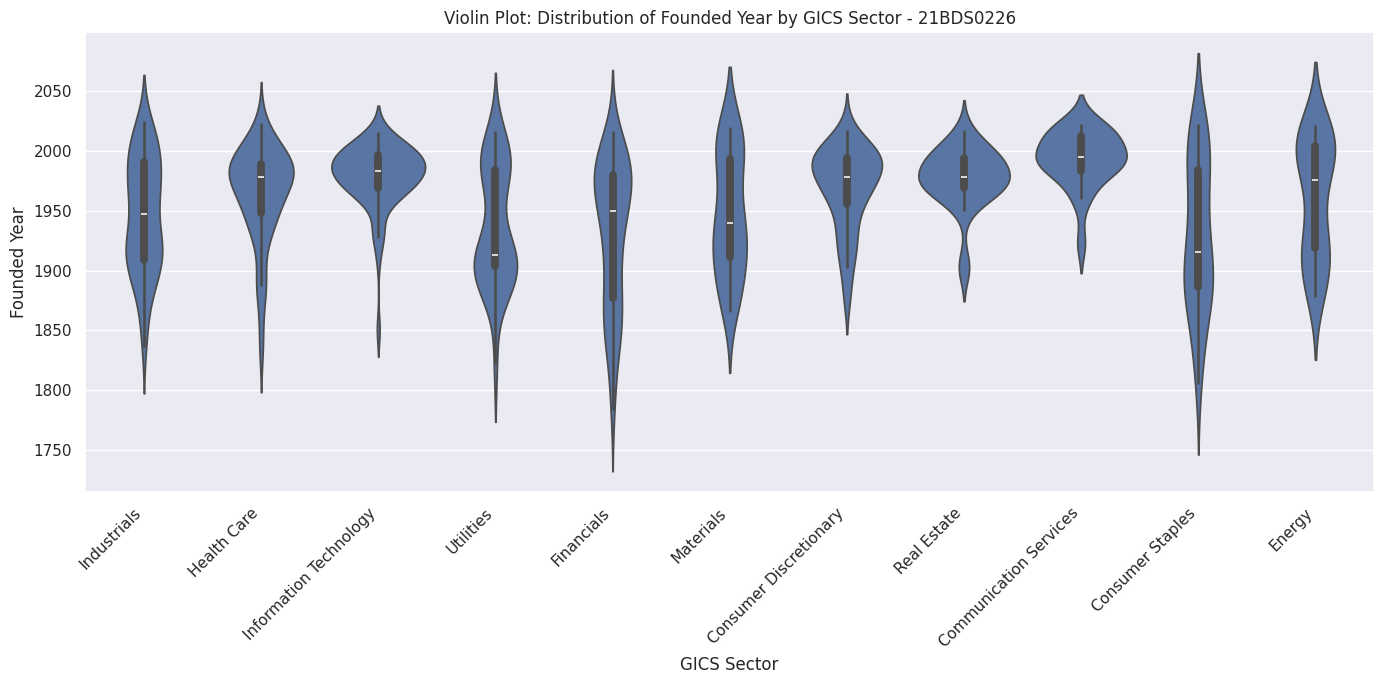

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='GICS Sector', y='Founded', data=Kdf)

plt.title('Violin Plot: Distribution of Founded Year by GICS Sector - 21BDS0226')
plt.xlabel('GICS Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.5 Scatter plot**

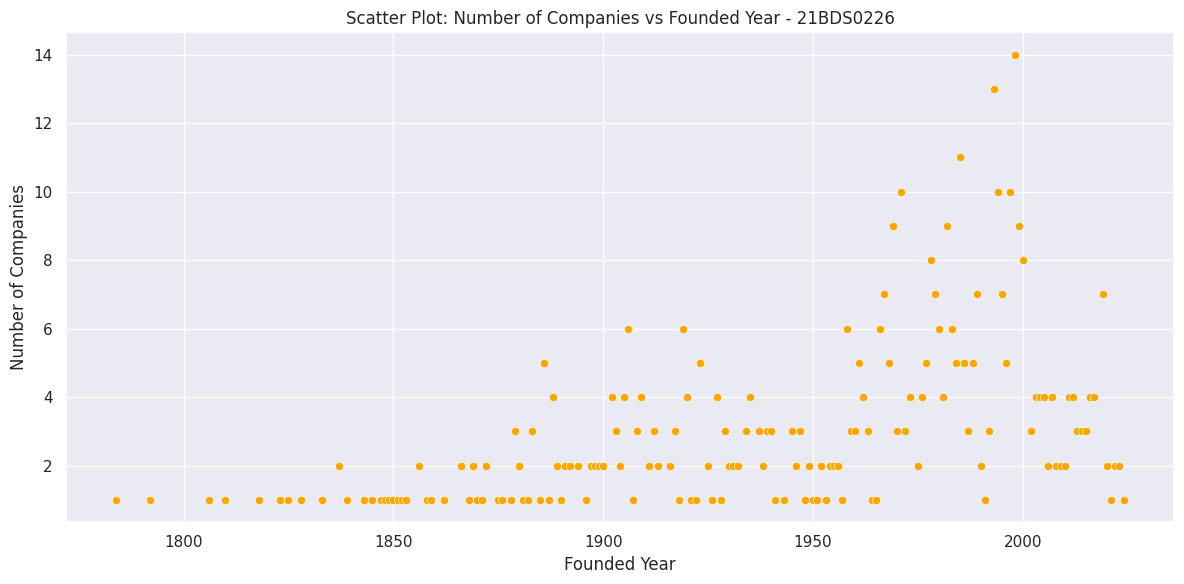

In [ ]:
# Count companies per founded year
founded_counts = Kdf['Founded'].value_counts().reset_index()
founded_counts.columns = ['Founded', 'Company Count']
founded_counts = founded_counts.sort_values('Founded')

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=founded_counts, x='Founded', y='Company Count', color='orange')

plt.title('Scatter Plot: Number of Companies vs Founded Year - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


3.6 Lineplot

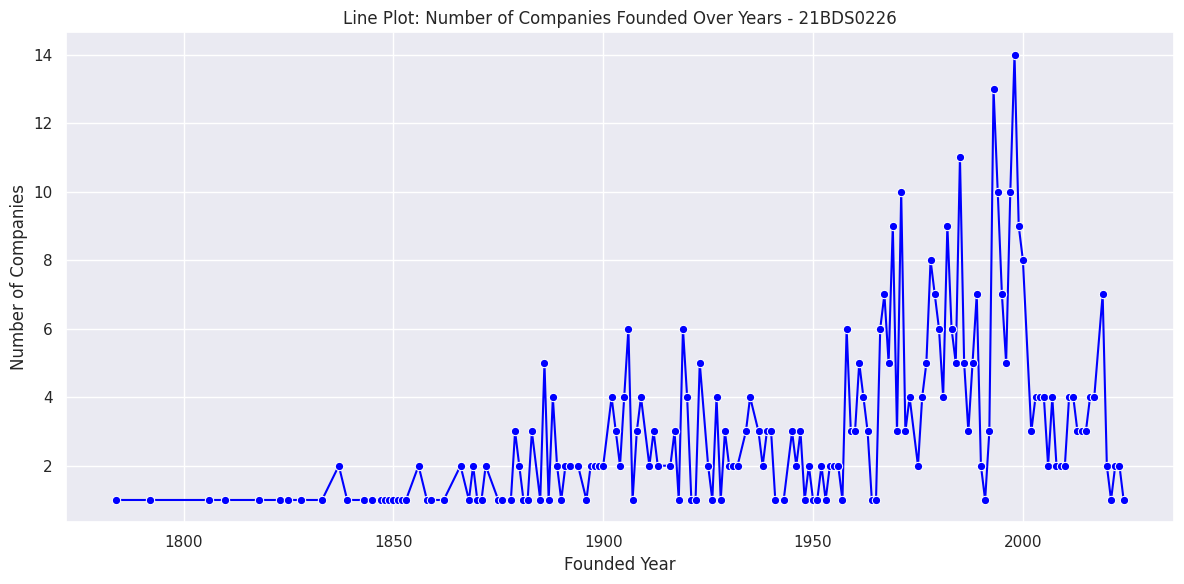

In [ ]:
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=founded_counts, x='Founded', y='Company Count', marker='o', color='blue')

plt.title('Line Plot: Number of Companies Founded Over Years - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


**SINCE HEATMAP BECOMES TOO COMPLEX FOR THE GIVEN DATA , SO A HEATMAP WHICH SHOWS THE NUMBER OF COMPANIES PRESENT BASED ON THE SECTOR AND CITY IS CREATED**

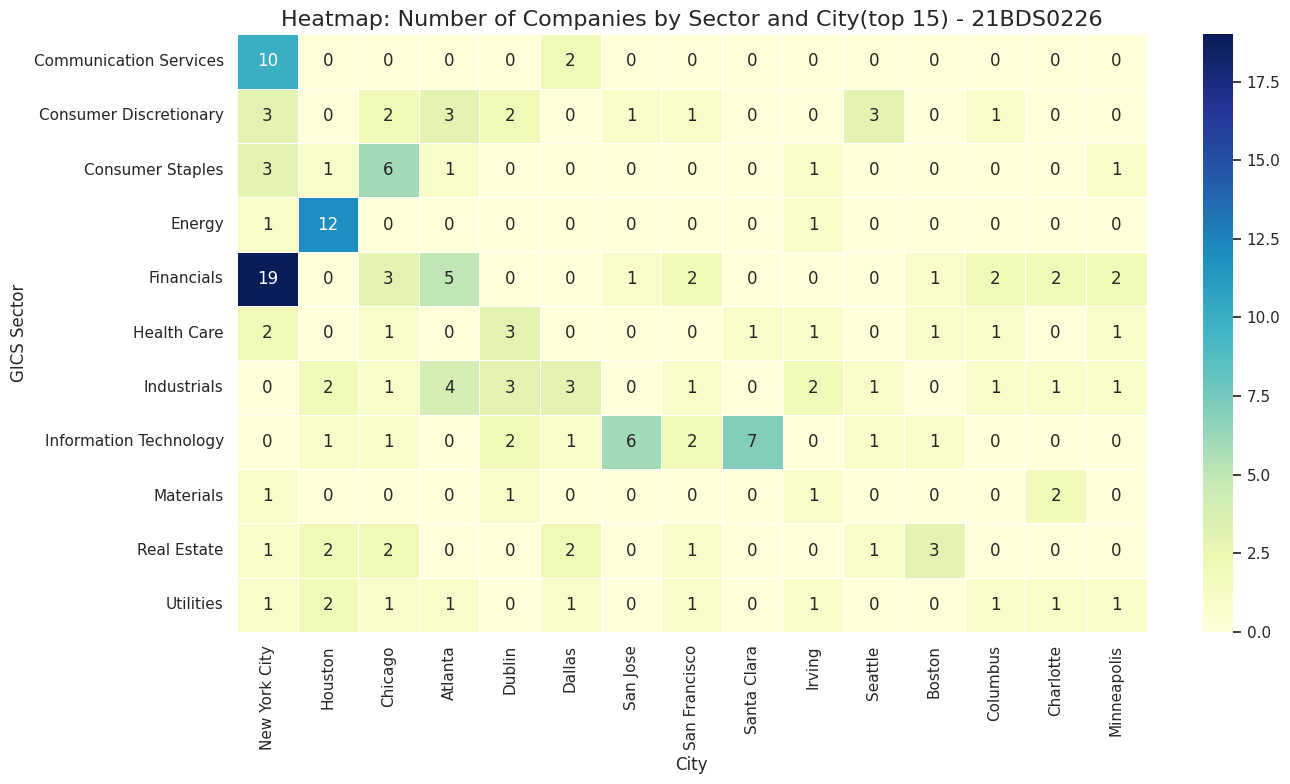

In [ ]:
#NOTE top 15 cities are taken for clarity
# Create a contingency table (frequency matrix)
heatmap_data = pd.crosstab(Kdf['GICS Sector'], Kdf['City'])


top_15_cities = Kdf['City'].value_counts().head(15).index
heatmap_data = heatmap_data[top_15_cities]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title('Heatmap: Number of Companies by Sector and City(top 15) - 21BDS0226', fontsize=16)
plt.xlabel('City')
plt.ylabel('GICS Sector')
plt.tight_layout()
plt.show()


# **4. MULTIVARIATE ANALYSIS**

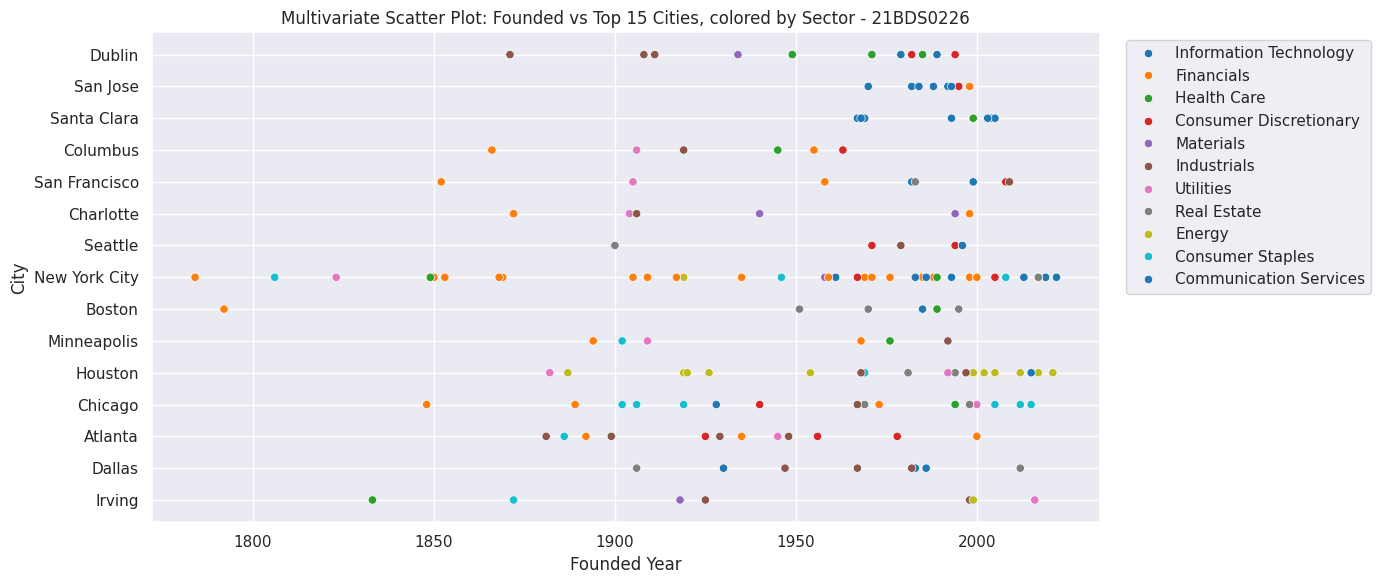

In [ ]:
top_15_cities = Kdf['City'].value_counts().head(15).index

filtered_Kdf = Kdf[Kdf['City'].isin(top_15_cities)]

plt.figure(figsize=(14, 6))
sns.scatterplot(data=filtered_Kdf, x='Founded', y='City', hue='GICS Sector', palette='tab10')

plt.title('Multivariate Scatter Plot: Founded vs Top 15 Cities, colored by Sector - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('City')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



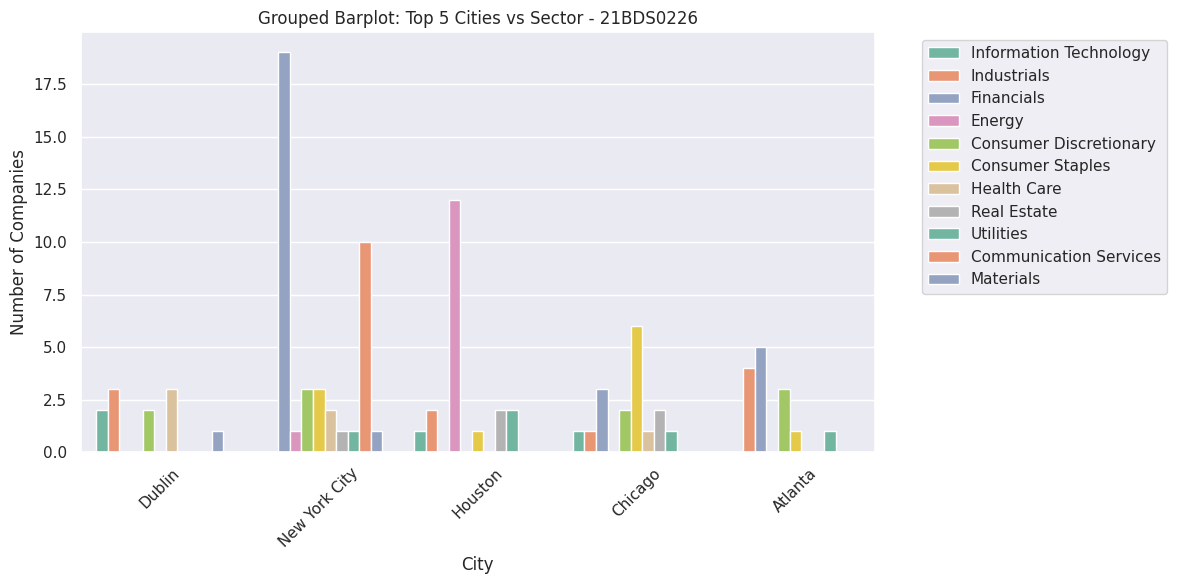

In [ ]:
top_cities = Kdf['City'].value_counts().head(5).index
filtered_df = Kdf[Kdf['City'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='City', hue='GICS Sector', palette='Set2')

plt.title('Grouped Barplot: Top 5 Cities vs Sector - 21BDS0226')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


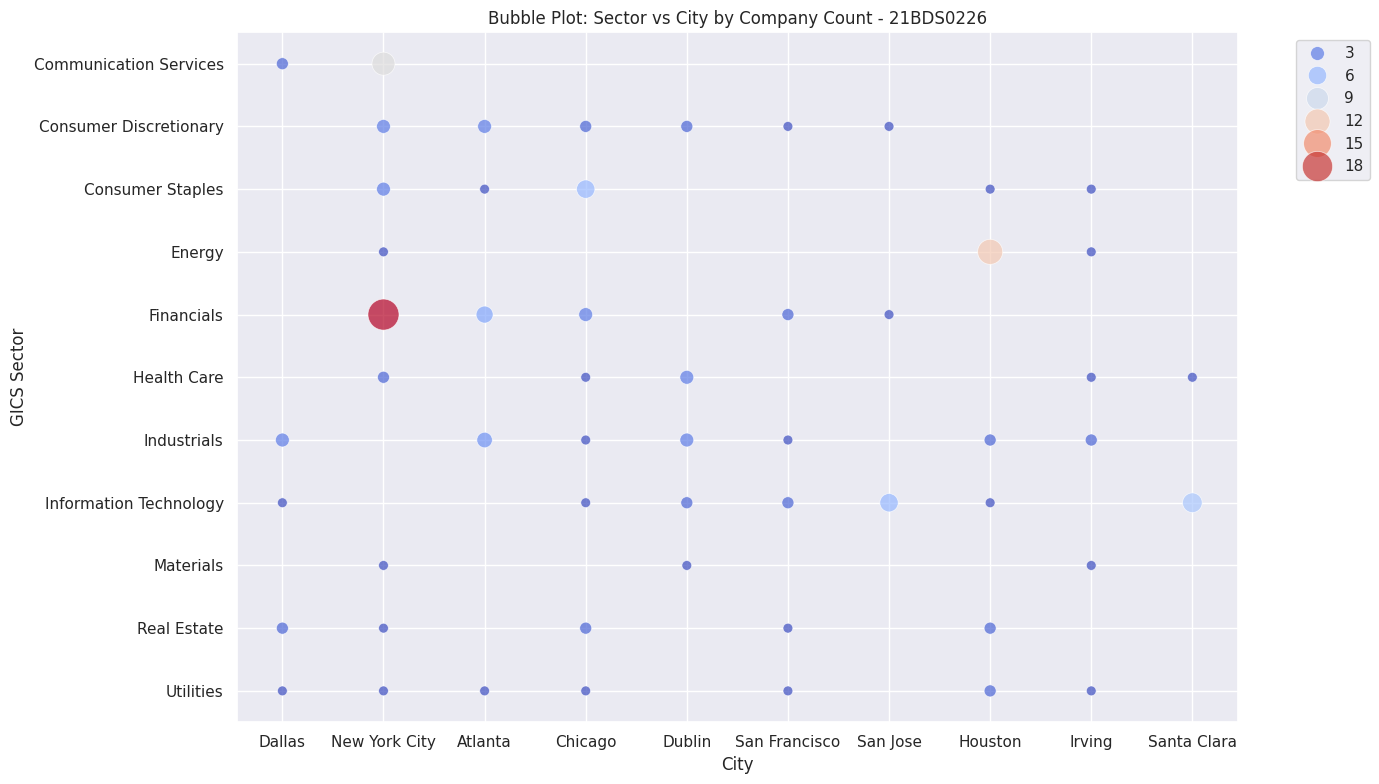

In [ ]:
bubble_data = Kdf.groupby(['GICS Sector', 'City']).size().reset_index(name='Count')
top_cities_bubble = Kdf['City'].value_counts().head(10).index
bubble_data = bubble_data[bubble_data['City'].isin(top_cities_bubble)]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=bubble_data, x='City', y='GICS Sector',
                size='Count', sizes=(50, 500), hue='Count', palette='coolwarm', alpha=0.7)

plt.title('Bubble Plot: Sector vs City by Company Count - 21BDS0226')
plt.xlabel('City')
plt.ylabel('GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


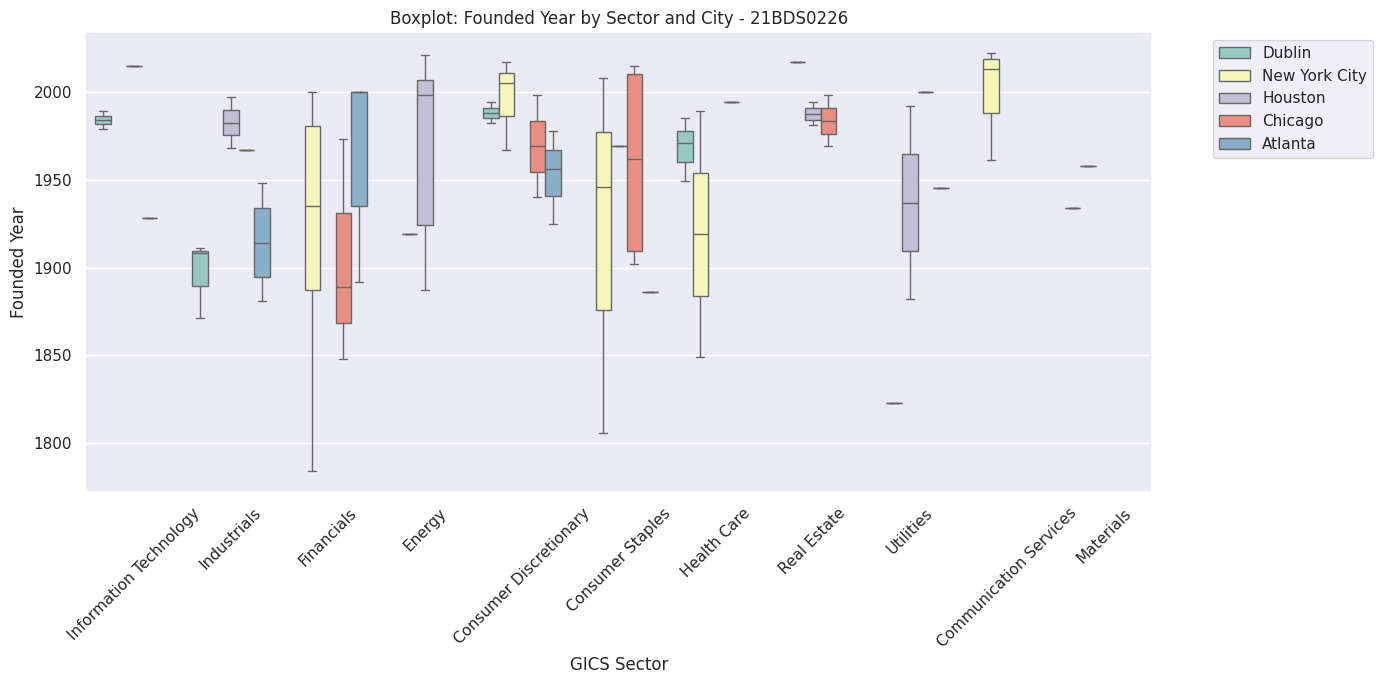

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x='GICS Sector', y='Founded', hue='City', palette='Set3')

plt.title('Boxplot: Founded Year by Sector and City - 21BDS0226')
plt.xlabel('GICS Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **MODULE 2**

DATA MERGING

In [ ]:
df_merge = Kdf[['CIK', 'Founded']]
df_merged = pd.merge(Kdf, df_merge, on='CIK')

# View the merged dataframe
df_merged.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry Date added      CIK  Founded_x  \
0        Industrial Conglomerates 1957-03-04    66740       1902   
1               Building Products 2017-07-26    91142       1916   
2           Health Care Equipment 1957-03-04     1800       1888   
3                   Biotechnology 2012-12-31  1551152       2013   
4  IT Consulting & Other Services 2011-07-06  1467373       1989   

            City   Location  Founded_y  
0     Saint Paul  Minnesota       1902  
1      Milwaukee  Wisconsin       1916  
2  North Chicago   Illinois       1888  
3  North Chicago   Illinois       2013  
4         Dublin    Ireland       1989

Transformation Techniques

In [ ]:
# Applying log transformation to reduce skewness
LOG_CIK = np.log(df['CIK'] + 1)
LOG_CIK.head(8)


0    11.108575
1    11.420185
2     7.496097
3    14.254509
4    14.198985
5    13.587787
6     7.819636
7    13.681707
Name: CIK, dtype: float64

**De-centralization and binning on founded year**

In [ ]:
# Create bins and labels for decades
bins = [1800, 1900, 1950, 2000, 2010, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', '2000-2010', '2010-2025']

# Create a new DataFrame with 'Founded' and the new bin column
Bdf = Kdf[['Founded']].copy()
Bdf['Founded_Bin'] = pd.cut(Kdf['Founded'], bins=bins, labels=labels)

Bdf.head(8)



Founded  Founded_Bin
0     1902    1900-1950
1     1916    1900-1950
2     1888  Before 1900
3     2013    2010-2025
4     1989    1950-2000
5     1982    1950-2000
6     1969    1950-2000
7     1981    1950-2000

# **MODULE 3**

7.1 Time-Series Analysis

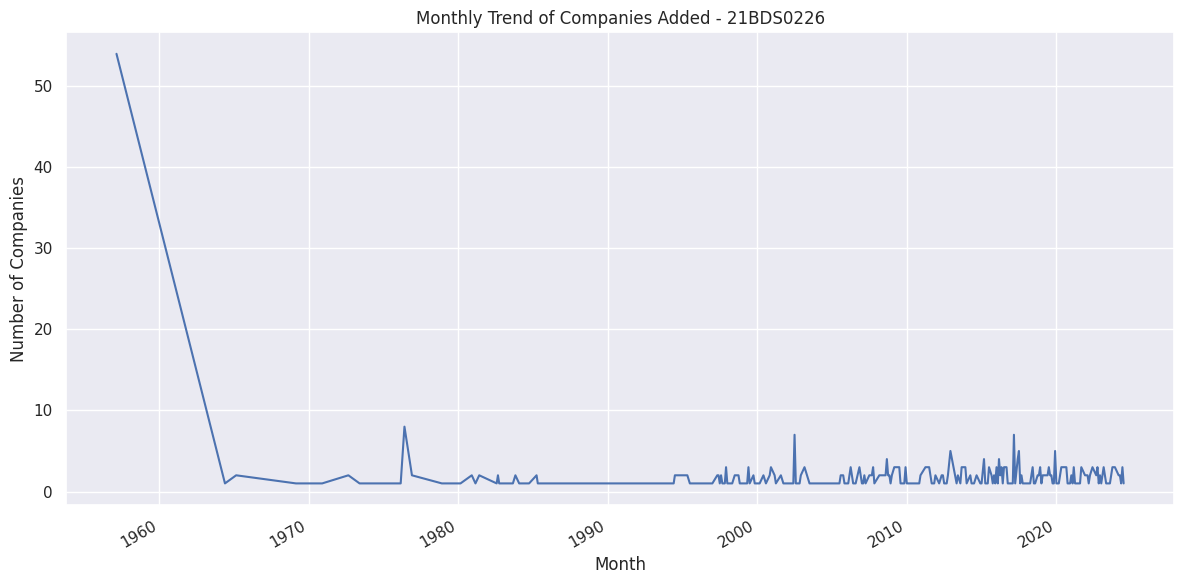

In [ ]:
# Extract month and year for more detailed view
Kdf['Added_Month'] = Kdf['Date added'].dt.to_period('M')
monthly_additions = Kdf['Added_Month'].value_counts().sort_index()

# Convert PeriodIndex to datetime for plotting
monthly_additions.index = monthly_additions.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
monthly_additions.plot()
plt.title('Monthly Trend of Companies Added - 21BDS0226')
plt.xlabel('Month')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


**Start and end column**

In [ ]:
# Ensure 'Date added' is datetime
Kdf['Date added'] = pd.to_datetime(Kdf['Date added'], errors='coerce')

# Get start and end date
start_date = Kdf['Date added'].min()
end_date = Kdf['Date added'].max()

print(f" Start Date: {start_date.strftime('%Y-%m-%d')}")
print(f" End Date: {end_date.strftime('%Y-%m-%d')}")



 Start Date: 1957-03-04
 End Date: 2024-07-08


**frequency**

In [ ]:
# Extract year from 'Date added'
Kdf['Added_Year'] = Kdf['Date added'].dt.year

# Count companies added per year
yearly_freq = Kdf['Added_Year'].value_counts().sort_index()

# Display frequency
print(yearly_freq)


Added_Year
1957    54
1964     1
1965     2
1969     2
1970     2
1972     2
1973     2
1974     1
1975     2
1976    11
1978     1
1979     2
1980     3
1981     3
1982     5
1983     4
1984     5
1985     7
1986     3
1987     2
1988     4
1989     5
1991     1
1992     3
1993     3
1994     7
1995     7
1996     2
1997    14
1998    11
1999     9
2000     9
2001     8
2002    13
2003     5
2004     6
2005     7
2006    10
2007    13
2008    17
2009    13
2010     9
2011    11
2012    14
2013    10
2014     8
2015    16
2016    23
2017    23
2018    15
2019    23
2020    15
2021    15
2022    16
2023    15
2024     9
Name: count, dtype: int64


# **MODULE 4**

Measures of Central Tendency - mean , median , mode

In [ ]:
# Select only numeric columns from the dataset
numeric_Kdf = Kdf.select_dtypes(include='number')

# Calculate mean
mean_values = numeric_Kdf.mean()

# Calculate median
median_values = numeric_Kdf.median()

# Calculate mode (can have multiple modes, so take the first one)
mode_values = numeric_Kdf.mode().iloc[0]

# Display results
print(" Mean:\n", mean_values)
print("\n Median:\n", median_values)
print("\n Mode:\n", mode_values)


 Mean:
 CIK           821753.648111
Founded         1955.737575
Added_Year      2000.914513
dtype: float64

 Median:
 CIK           900075.0
Founded         1971.0
Added_Year      2008.0
dtype: float64

 Mode:
 CIK           1564708.0
Founded          1998.0
Added_Year       1957.0
Name: 0, dtype: float64


QUNATILE AND DECILES

In [ ]:
numeric_Kdf = Kdf.select_dtypes(include='number')
quantiles = numeric_Kdf.quantile([0.25, 0.5, 0.75])

print(quantiles)

deciles = numeric_Kdf.quantile([i/10 for i in range(11)])

print("\n Deciles (10% intervals):\n")
print(deciles)


            CIK  Founded  Added_Year
0.25   100505.0   1920.0      1992.0
0.50   900075.0   1971.0      2008.0
0.75  1175188.0   1994.0      2017.0

 Deciles (10% intervals):

           CIK  Founded  Added_Year
0.0     1800.0   1784.0      1957.0
0.1    36573.0   1886.0      1957.0
0.2    77686.8   1909.0      1984.0
0.3   320190.6   1933.2      1997.0
0.4   814987.0   1959.0      2002.0
0.5   900075.0   1971.0      2008.0
0.6  1035302.2   1981.0      2012.0
0.7  1110298.6   1989.0      2016.0
0.8  1339631.4   1997.0      2018.0
0.9  1570500.8   2006.0      2021.0
1.0  2005951.0   2024.0      2024.0


In [ ]:
founded_years = Kdf['Founded'].dropna()

# IQR = Q3 - Q1
Q1 = founded_years.quantile(0.25)
Q3 = founded_years.quantile(0.75)
IQR = Q3 - Q1

# Standard Deviation
std_dev = founded_years.std()

# Range = max - min
range_value = founded_years.max() - founded_years.min()

# Display results
print(f" IQR (Interquartile Range): {IQR}")
print(f" Standard Deviation (SD): {std_dev}")
print(f" Range (Max - Min): {range_value}")


 IQR (Interquartile Range): 74.0
 Standard Deviation (SD): 48.74871251422678
 Range (Max - Min): 240


Frequency Distribution - Histogram

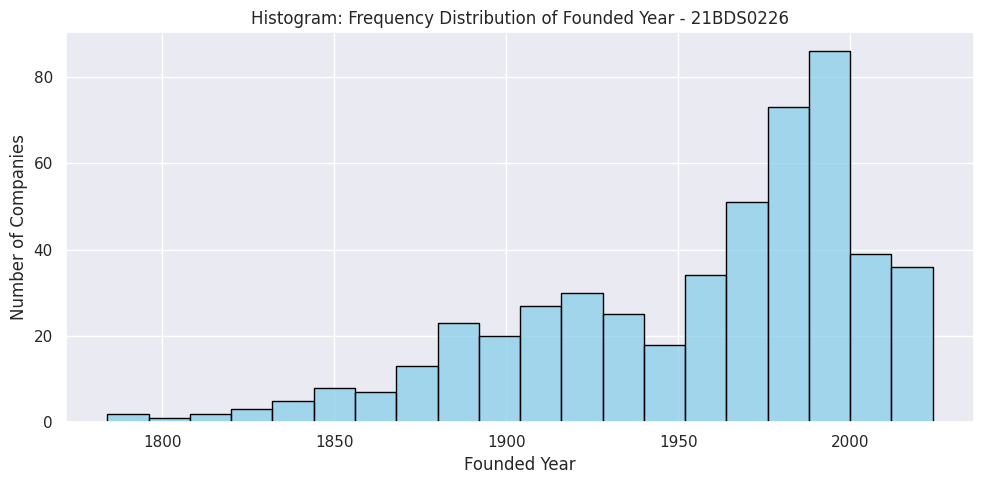

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(Kdf['Founded'], bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Histogram: Frequency Distribution of Founded Year - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


**Relative Frequency Distribution**

In [ ]:
# Frequency counts
freq = Kdf['Founded'].value_counts().sort_index()

# Relative frequency = frequency / total number of entries
relative_freq = freq / freq.sum()

# Display top 10 for sample
print("📊 Relative Frequency (Top 10 Years):\n")
print(relative_freq.head(10))


📊 Relative Frequency (Top 10 Years):

Founded
1784    0.001988
1792    0.001988
1806    0.001988
1810    0.001988
1818    0.001988
1823    0.001988
1825    0.001988
1828    0.001988
1833    0.001988
1837    0.003976
Name: count, dtype: float64


**Cummulative Frequency**

In [ ]:
# Cumulative frequency
cumulative_freq = freq.cumsum()

# Display top 10 for sample
print(" Cumulative Frequency (Top 10 Years):\n")
print(cumulative_freq.head(10))


 Cumulative Frequency (Top 10 Years):

Founded
1784     1
1792     2
1806     3
1810     4
1818     5
1823     6
1825     7
1828     8
1833     9
1837    11
Name: count, dtype: int64


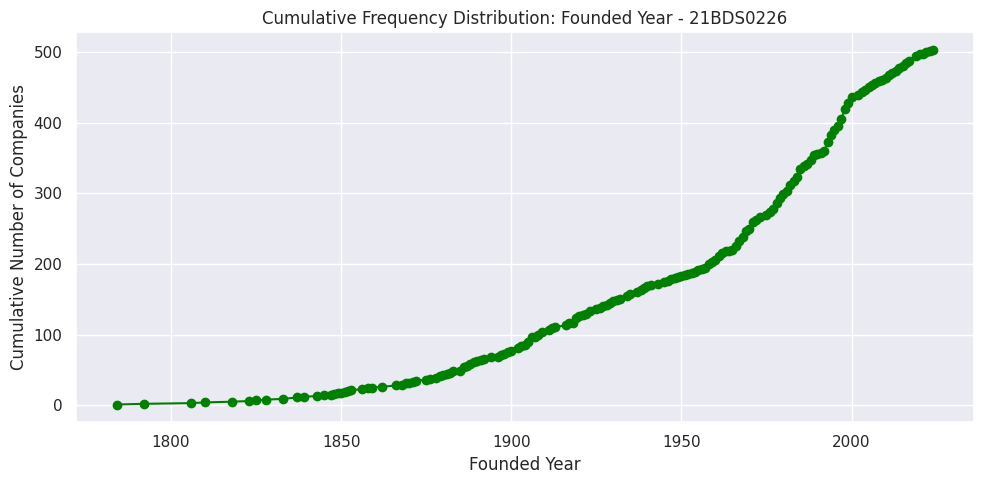

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_freq.index, cumulative_freq.values, marker='o', linestyle='-', color='green')

plt.title('Cumulative Frequency Distribution: Founded Year - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('Cumulative Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


Categorical Variable Analysis -Pie plot , Stacked Barplot

In [ ]:
# Making a founded year into bins and plot is as pie plot
# Define bins and labels
bins = [1800, 1900, 1950, 2000, 2010, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', '2000-2010', '2010-2025']

# Create binned column
Kdf['Founded_Bin'] = pd.cut(Kdf['Founded'], bins=bins, labels=labels)
# Count companies in each bin
founded_bin_counts = Kdf['Founded_Bin'].value_counts().sort_index()


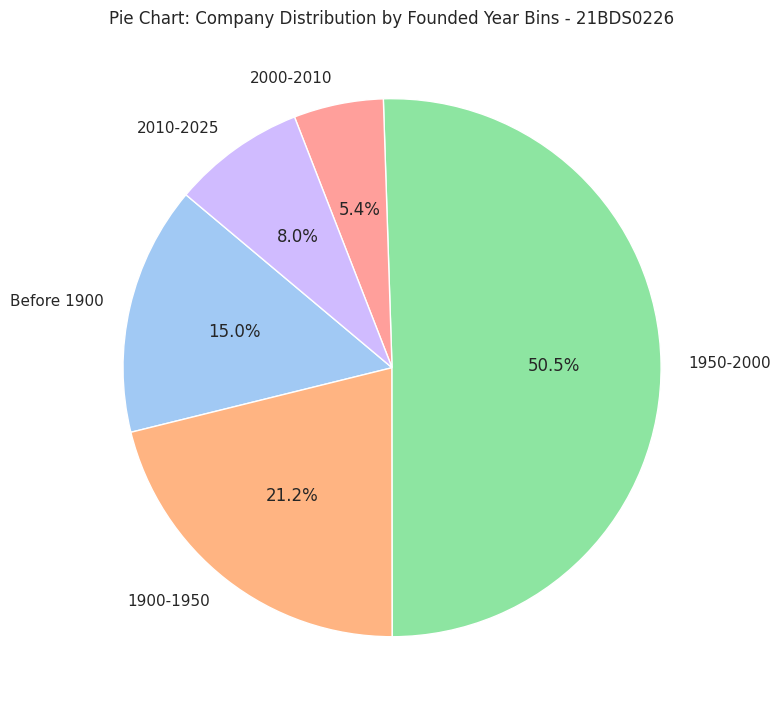

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(founded_bin_counts, labels=founded_bin_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Pie Chart: Company Distribution by Founded Year Bins - 21BDS0226')
plt.tight_layout()
plt.show()


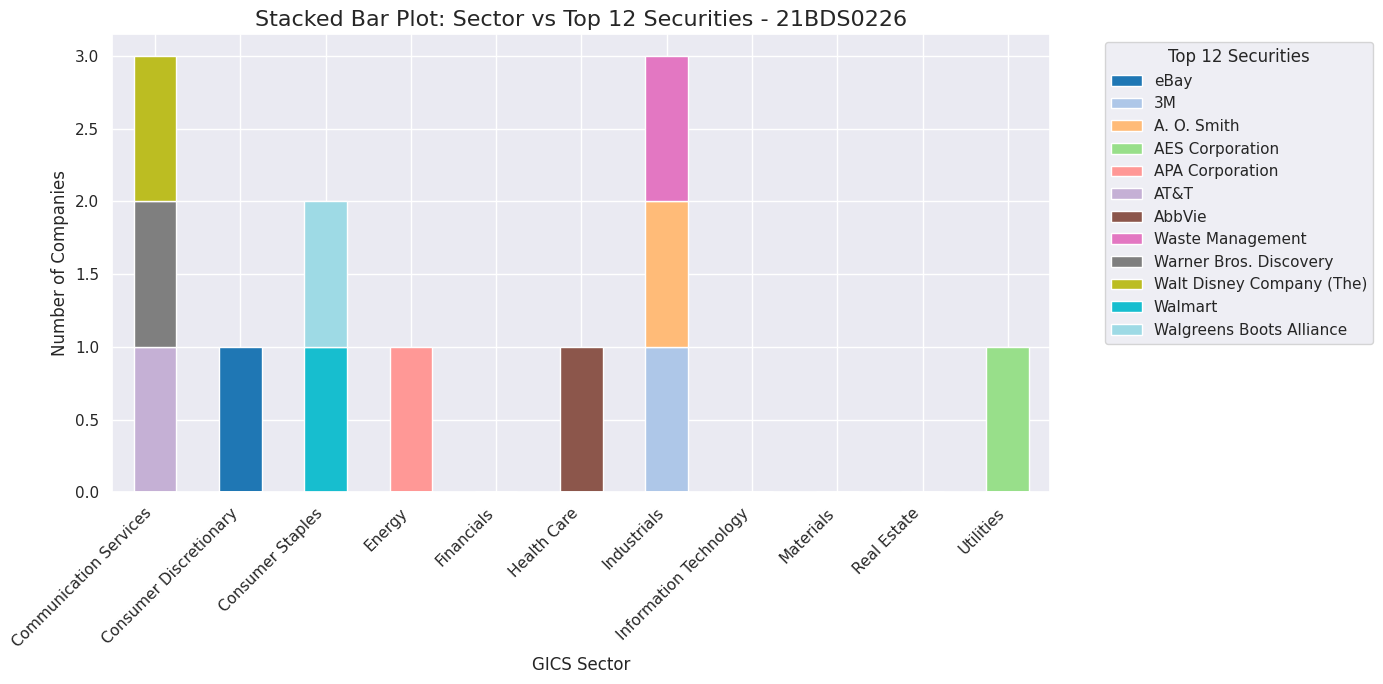

In [ ]:
contingency_table1 = pd.crosstab(Kdf['GICS Sector'], Kdf['Security'])
#Since the chart becomes too complex , so I am just taking top 12
# Get top 12 securities by total count
top_12_securities = contingency_table1.sum().sort_values(ascending=False).head(12).index

# Filter only top 12 securities
contingency_table_top12 = contingency_table1[top_12_securities]

# Plot
contingency_table_top12.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Stacked Bar Plot: Sector vs Top 12 Securities - 21BDS0226', fontsize=16)
plt.xlabel('GICS Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top 12 Securities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Create 2-Way Contingency Tables for Categorical-Categorical, Numerical-Numerical, and Categorical-Numerical Variables**

In [ ]:
# Categorical vs Categorical
cat_cat_table = pd.crosstab(Kdf['GICS Sector'], Kdf['City'])

print(" Categorical vs Categorical - GICS Sector vs City (2-way table):\n")
print(cat_cat_table.head())  # Print first few rows


 Categorical vs Categorical - GICS Sector vs City (2-way table):

City                    Acton  Akron  Allentown  Ann Arbor  Arlington  Armonk  \
GICS Sector                                                                     
Communication Services      0      0          0          0          0       0   
Consumer Discretionary      0      0          0          1          1       0   
Consumer Staples            0      0          0          0          0       0   
Energy                      0      0          0          0          0       0   
Financials                  0      0          0          0          0       0   

City                    Atlanta  Auburn Hills  Austin  Baltimore  ...  \
GICS Sector                                                       ...   
Communication Services        0             0       0          0  ...   
Consumer Discretionary        3             1       1          0  ...   
Consumer Staples              1             0       1          0  ...   
E

In [ ]:
# Bin Founded years
Kdf['Founded_Bin'] = pd.cut(Kdf['Founded'], bins=[1800, 1900, 1950, 2000, 2010, 2025])

# Numerical vs Numerical: Aggregated count of companies by Founded bins and CIK ranges
Kdf['CIK_Bin'] = pd.qcut(Kdf['CIK'], q=5)

num_num_table = pd.crosstab(Kdf['Founded_Bin'], Kdf['CIK_Bin'])

print("📊 Numerical vs Numerical - Founded Bin vs CIK Bin (2-way table):\n")
print(num_num_table)


📊 Numerical vs Numerical - Founded Bin vs CIK Bin (2-way table):

CIK_Bin       (1799.999, 77686.8]  (77686.8, 814987.0]  (814987.0, 1035302.2]  \
Founded_Bin                                                                     
(1800, 1900]                   31                   23                      8   
(1900, 1950]                   43                   23                     15   
(1950, 2000]                   25                   50                     76   
(2000, 2010]                    2                    1                      0   
(2010, 2025]                    0                    2                      2   

CIK_Bin       (1035302.2, 1339631.4]  (1339631.4, 2005951.0]  
Founded_Bin                                                   
(1800, 1900]                       8                       5  
(1900, 1950]                      16                       9  
(1950, 2000]                      63                      39  
(2000, 2010]                       9               

In [ ]:
# Categorical vs Numerical
cat_num_table = Kdf.groupby('GICS Sector')['Founded'].mean().round(2)

print("Categorical vs Numerical - Mean Founded Year per Sector:\n")
print(cat_num_table)


📊 Categorical vs Numerical - Mean Founded Year per Sector:

GICS Sector
Communication Services    1993.59
Consumer Discretionary    1968.96
Consumer Staples          1928.50
Energy                    1960.23
Financials                1931.04
Health Care               1964.25
Industrials               1946.05
Information Technology    1979.27
Materials                 1947.29
Real Estate               1977.35
Utilities                 1935.68
Name: Founded, dtype: float64


**Create a 3-Way Contingency Table**

In [ ]:
bins = [1800, 1900, 1950, 2000, 2010, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', '2000-2010', '2010-2025']
Kdf['Founded_Bin'] = pd.cut(Kdf['Founded'], bins=bins, labels=labels)

# Create 3-way contingency table
three_way_table = pd.crosstab(
    [Kdf['GICS Sector'], Kdf['City']],  # Rows: Sector & City
    Kdf['Founded_Bin']                 # Columns: Time Bins
)

# Display the table
print("3-Way Contingency Table: GICS Sector vs City vs Founded_Bin\n")
print(three_way_table.head(10))  # Display top 10 rows for clarity


3-Way Contingency Table: GICS Sector vs City vs Founded_Bin

Founded_Bin                           Before 1900  1900-1950  1950-2000  \
GICS Sector            City                                               
Communication Services Bellevue                 0          0          1   
                       Beverly Hills            0          0          0   
                       Burbank                  0          1          0   
                       Dallas                   0          0          2   
                       Los Gatos                0          0          1   
                       Menlo Park               0          0          0   
                       Mountain View            0          0          2   
                       New York City            0          0          4   
                       Philadelphia             0          0          1   
                       Redwood City             0          0          1   

Founded_Bin                           

**Apply Row Profile, Column Profile, Relative Frequency, and Chi-Square Test**

In [ ]:
bins = [1800, 1900, 1950, 2000, 2010, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', '2000-2010', '2010-2025']
Kdf['Founded_Bin'] = pd.cut(Kdf['Founded'], bins=bins, labels=labels)

# Contingency Table: GICS Sector vs Founded_Bin
contingency_table = pd.crosstab(Kdf['GICS Sector'], Kdf['Founded_Bin'])

# Display it
print(" Contingency Table:\n")
print(contingency_table)

row_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nRow Profile:\n")
print(row_profile.round(2))

column_profile = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("\n Column Profile:\n")
print(column_profile.round(2))

relative_freq = contingency_table / contingency_table.values.sum()
print("\n Relative Frequency Table:\n")
print(relative_freq.round(4))


 Contingency Table:

Founded_Bin             Before 1900  1900-1950  1950-2000  2000-2010  \
GICS Sector                                                            
Communication Services            0          1         13          2   
Consumer Discretionary            2         10         34          4   
Consumer Staples                 15          9          6          2   
Energy                            3          6          6          4   
Financials                       21         13         33          1   
Health Care                       7         10         40          3   
Industrials                      13         28         28          1   
Information Technology            1          5         51          6   
Materials                         6         10          6          2   
Real Estate                       1          1         25          2   
Utilities                         6         13         11          0   

Founded_Bin             2010-2025  
GICS S

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")



 Chi-Square Test Results:
Chi-Square Statistic: 157.53
Degrees of Freedom: 40
P-Value: 0.0000


**Display Scatter Plot for 2 Variables**

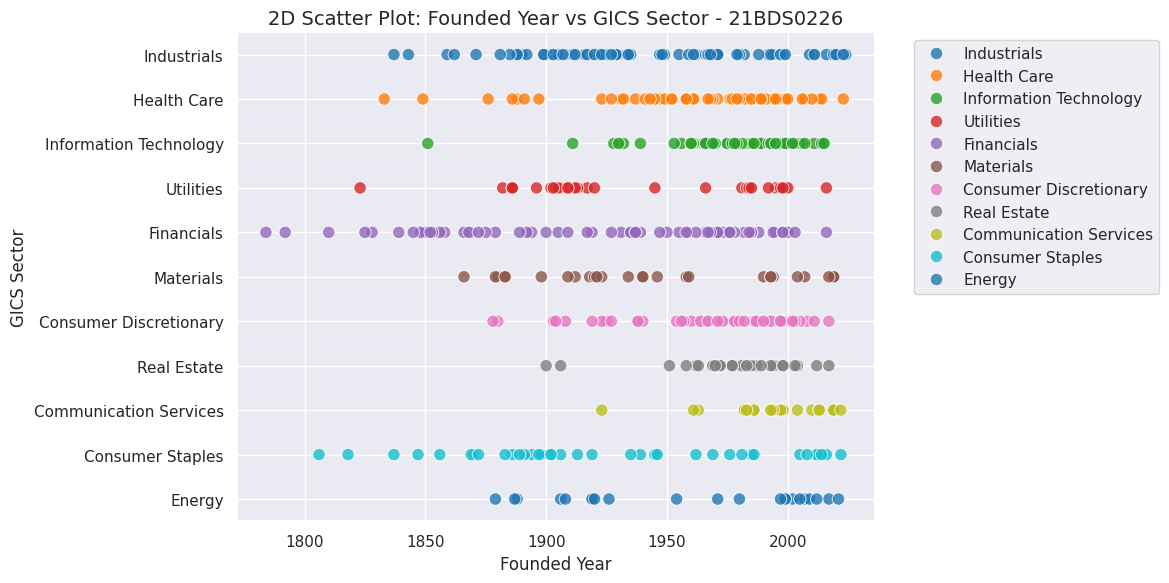

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Kdf, x='Founded', y='GICS Sector', hue='GICS Sector', palette='tab10', s=80, alpha=0.8)

plt.title('2D Scatter Plot: Founded Year vs GICS Sector - 21BDS0226', fontsize=14)
plt.xlabel('Founded Year')
plt.ylabel('GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3D Scatter plot**

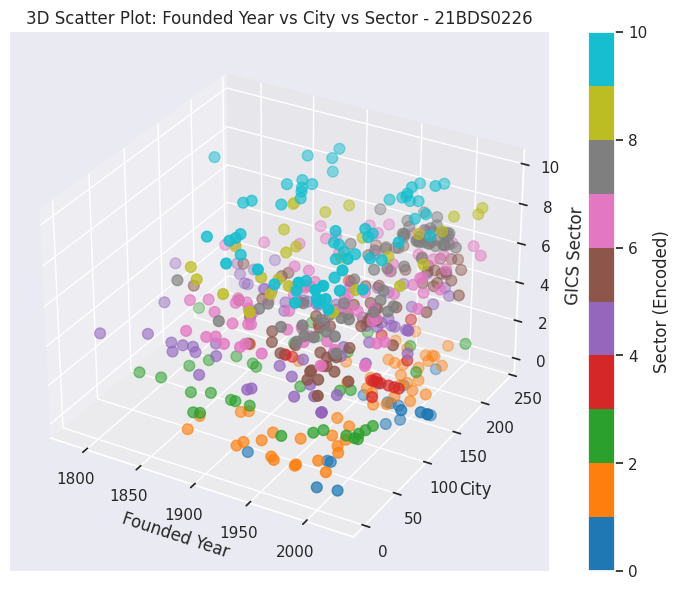

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_city = LabelEncoder()
le_sector = LabelEncoder()
Kdf['City_Encoded'] = le_city.fit_transform(Kdf['City'])
Kdf['Sector_Encoded'] = le_sector.fit_transform(Kdf['GICS Sector'])

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Kdf['Founded'], Kdf['City_Encoded'], Kdf['Sector_Encoded'],
                     c=Kdf['Sector_Encoded'], cmap='tab10', s=60)

# Label axes
ax.set_xlabel('Founded Year')
ax.set_ylabel('City')
ax.set_zlabel('GICS Sector')
ax.set_title('3D Scatter Plot: Founded Year vs City vs Sector - 21BDS0226')

# Add colorbar
plt.colorbar(scatter, label='Sector (Encoded)')
plt.show()


**2D Boxplot**

<ipython-input-175-730a69c5185f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Kdf, x='GICS Sector', y='Founded', palette='Set3')


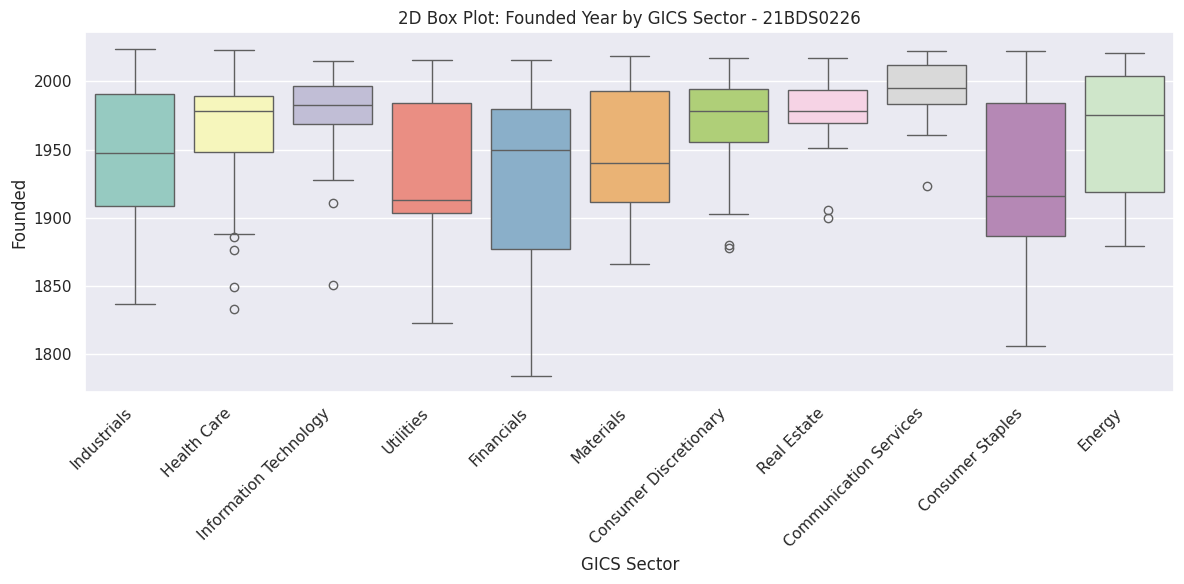

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Kdf, x='GICS Sector', y='Founded', palette='Set3')

plt.title('2D Box Plot: Founded Year by GICS Sector - 21BDS0226')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


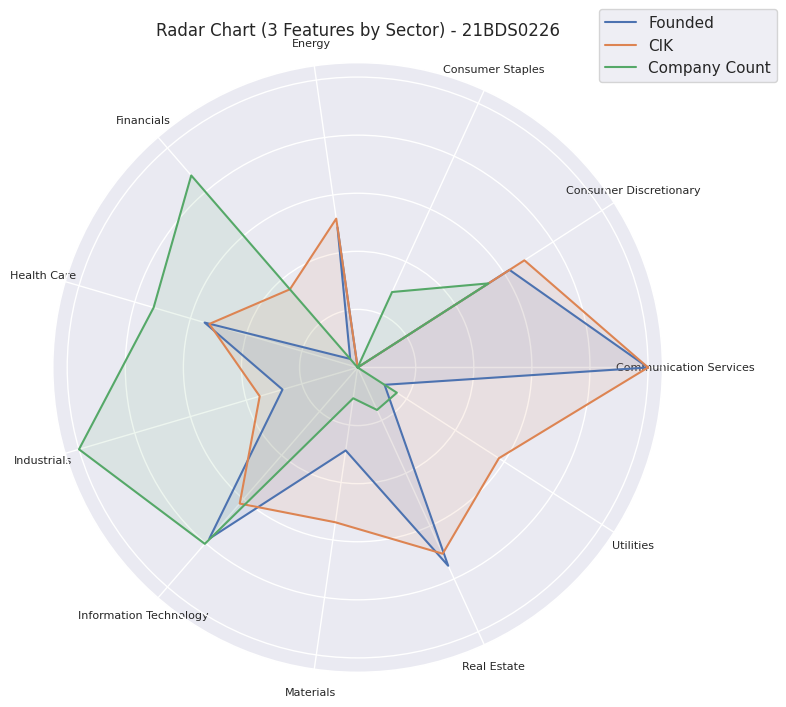

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare features
# Treat CIK as numeric (or use count of companies)
Kdf['Company Count'] = 1  # dummy column to count number of companies

# Group by sector and calculate mean values
sector_grouped = Kdf.groupby('GICS Sector').agg({
    'Founded': 'mean',
    'CIK': 'mean',
    'Company Count': 'sum'  # total companies in sector
}).reset_index()

# Step 2: Normalize data (for fair comparison)
data_norm = sector_grouped.copy()
features = ['Founded', 'CIK', 'Company Count']

for feature in features:
    data_norm[feature] = (data_norm[feature] - data_norm[feature].min()) / (data_norm[feature].max() - data_norm[feature].min())

# Step 3: Prepare radar chart data
labels = data_norm['GICS Sector'].tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # to complete the circle

# Step 4: Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each feature
for feature in features:
    values = data_norm[feature].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=feature)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)

ax.set_title('Radar Chart (3 Features by Sector) - 21BDS0226', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.set_yticklabels([])

plt.tight_layout()
plt.show()


# **MODULE 5**

KMeans Clustering

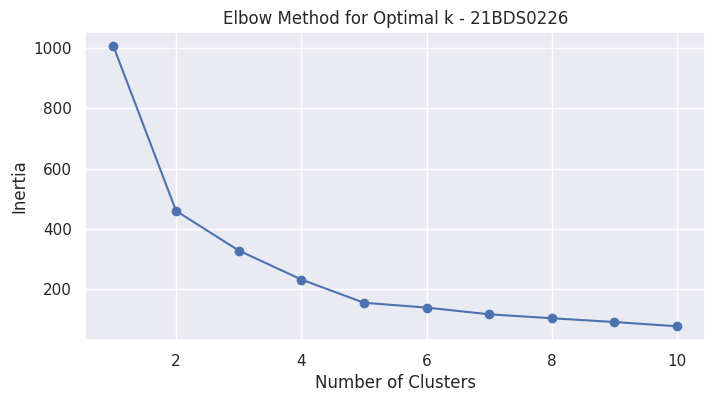

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select relevant numeric features
Kdf_numeric = Kdf[['Founded', 'CIK']].dropna()

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Kdf_numeric)

# Step 3: Use Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k - 21BDS0226')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


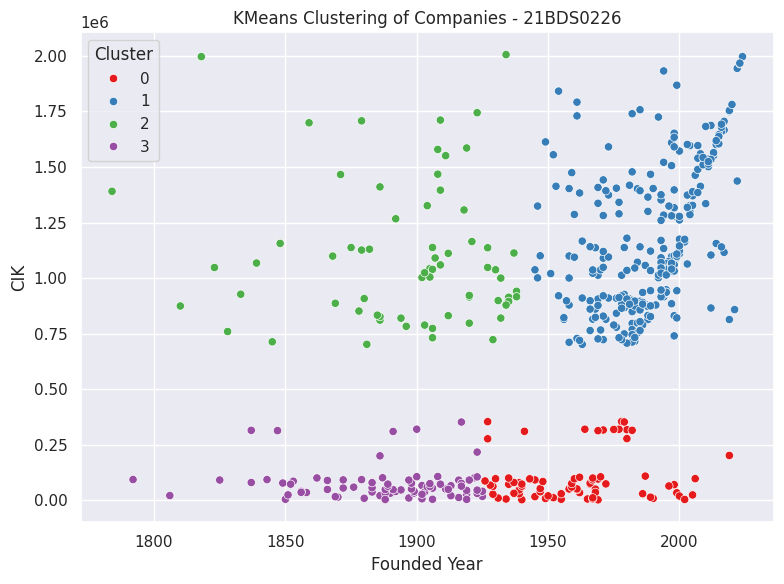

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
Kdf_numeric['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Kdf_numeric, x='Founded', y='CIK', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering of Companies - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**Heirachial Clustering(Using Euclidean and Manhattam)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

data = Kdf[['Founded', 'CIK']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


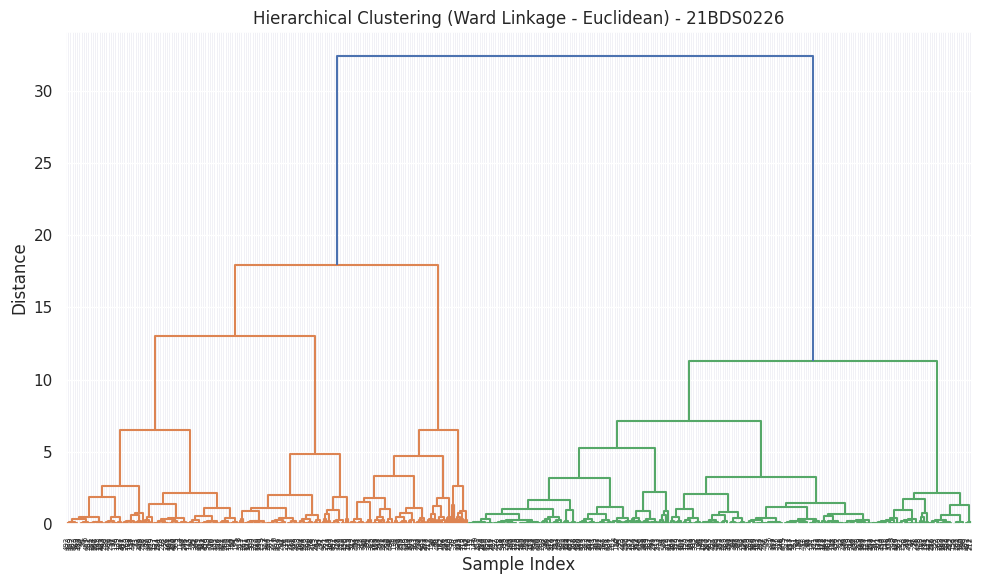

In [ ]:
# Ward linkage uses Euclidean distance
linked_ward = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked_ward, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering (Ward Linkage - Euclidean) - 21BDS0226')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


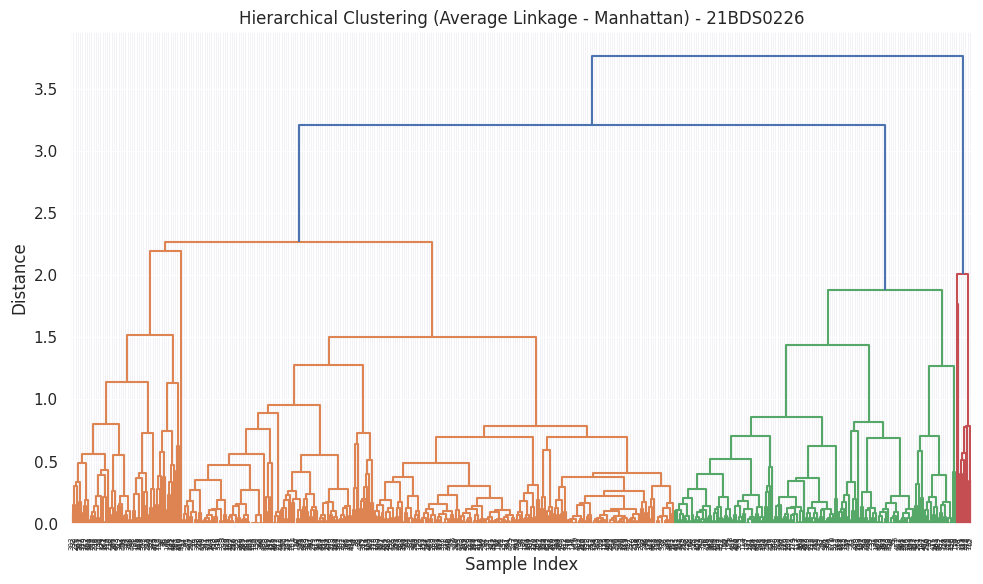

In [ ]:
from scipy.spatial.distance import cityblock

# Compute pairwise Manhattan distances
manhattan_dist = pdist(scaled_data, metric='cityblock')

linked_manhattan = linkage(manhattan_dist, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked_manhattan, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering (Average Linkage - Manhattan) - 21BDS0226')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


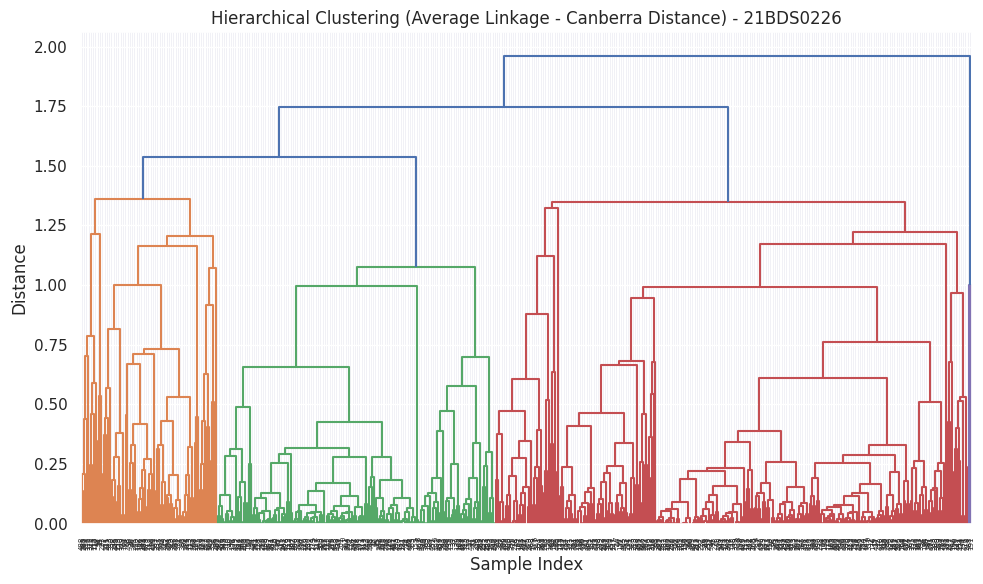

In [ ]:
# Compute Canberra distance matrix
canberra_dist = pdist(scaled_data, metric='canberra')

# Perform hierarchical clustering
linked_canberra = linkage(canberra_dist, method='average')

# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked_canberra, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering (Average Linkage - Canberra Distance) - 21BDS0226')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


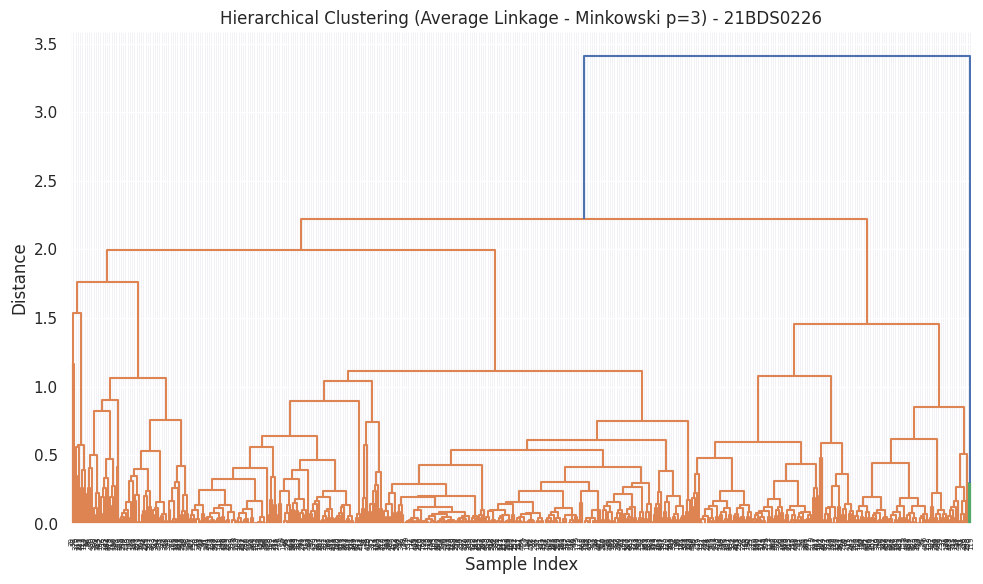

In [ ]:
# Compute Minkowski distance (example with p=3)
minkowski_dist = pdist(scaled_data, metric='minkowski', p=3)

# Perform hierarchical clustering
linked_minkowski = linkage(minkowski_dist, method='average')

# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked_minkowski, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering (Average Linkage - Minkowski p=3) - 21BDS0226')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN


In [ ]:
# Select numeric features (change if needed)
X = Kdf[['Founded', 'CIK']].dropna()

dbscan = DBSCAN(eps=500, min_samples=5)  # Adjust eps based on dataset scale

# Fit DBSCAN and get cluster labels
X['Cluster'] = dbscan.fit_predict(X)


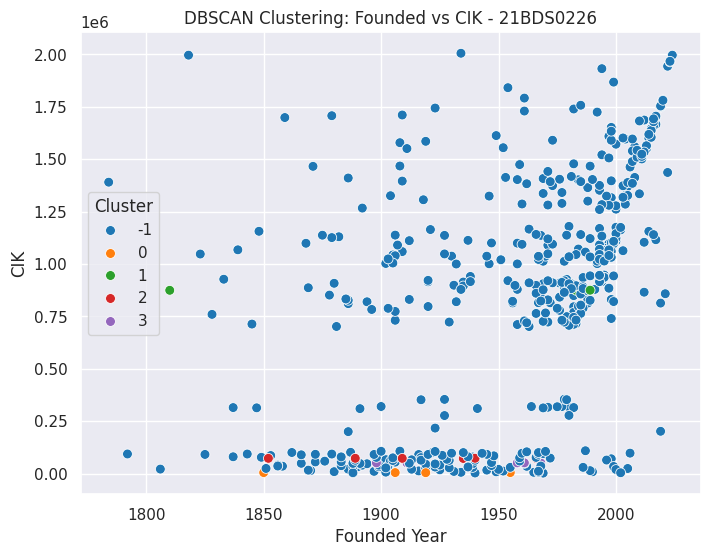

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Founded'], y=X['CIK'], hue=X['Cluster'], palette='tab10', s=50)
plt.title('DBSCAN Clustering: Founded vs CIK - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Count unique clusters
print("Unique Clusters Found:", np.unique(X['Cluster']))

# Count the number of points per cluster
print(X['Cluster'].value_counts())


Unique Clusters Found: [-1  0  1  2  3]
Cluster
-1    482
 2      6
 1      5
 0      5
 3      5
Name: count, dtype: int64


# **MODULE 6 : PRINCIPAL COMPONET ANALYSIS**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = Kdf.select_dtypes(include=['int64', 'float64']).dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)


In [ ]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


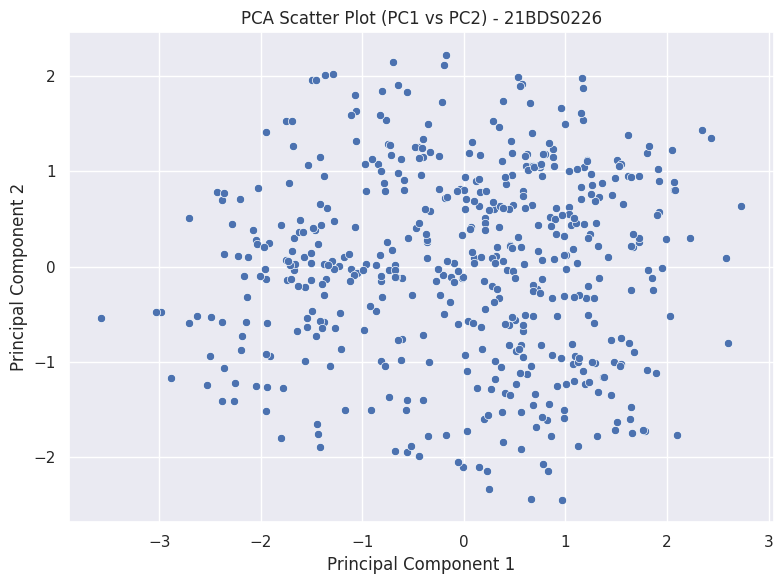

In [ ]:
# 2D Scatter plot using PC1 and PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA Scatter Plot (PC1 vs PC2) - 21BDS0226')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


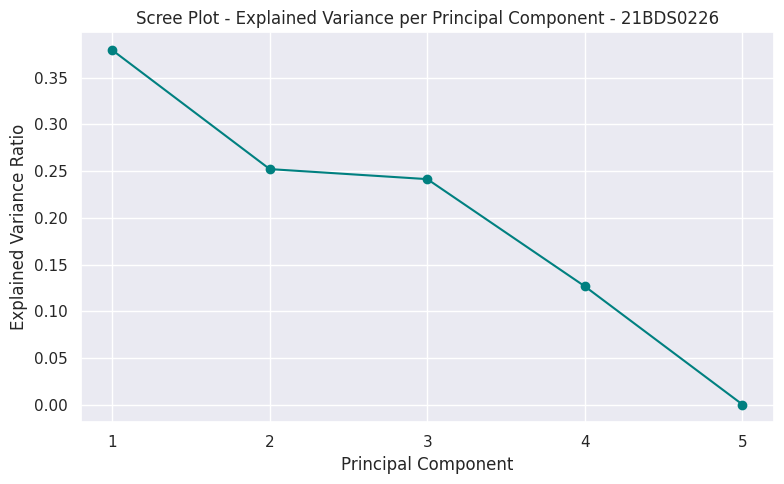

In [ ]:
# Scree Plot (explained variance ratio)
plt.figure(figsize=(8, 5))
components = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.plot(components, pca.explained_variance_ratio_, marker='o', linestyle='-', color='teal')
plt.title('Scree Plot - Explained Variance per Principal Component - 21BDS0226')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components)
plt.grid(True)
plt.tight_layout()
plt.show()


# **Module 7**

SIMPLE LINEAR REGRESSION

First we will remove the outliers for better prediction

In [ ]:
# Step 1: Remove outliers from CIK using IQR
Q1 = Kdf['CIK'].quantile(0.25)
Q3 = Kdf['CIK'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
Kdf_clean = Kdf[(Kdf['CIK'] >= Q1 - 1.5 * IQR) & (Kdf['CIK'] <= Q3 + 1.5 * IQR)]



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
Kdf_clean['CIK_Normalized'] = scaler.fit_transform(Kdf_clean[['CIK']])


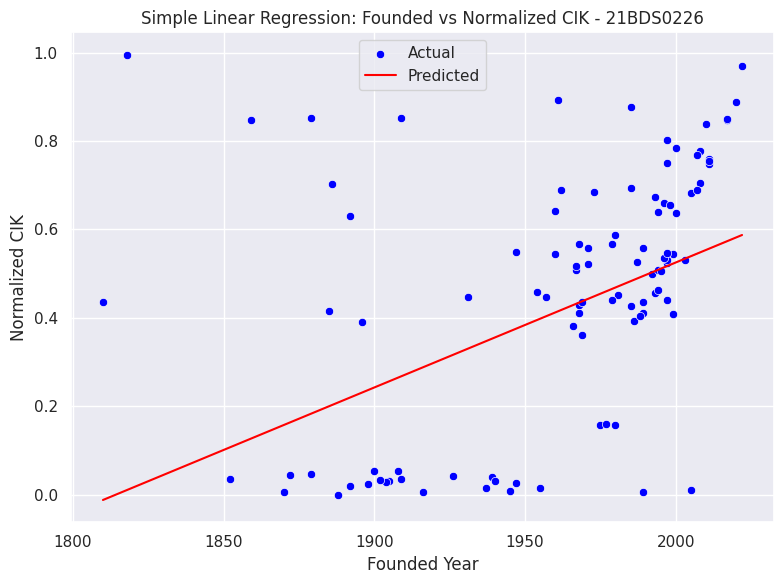

In [ ]:
# Select required columns and drop NAs
Kdf_slr = Kdf_clean[['Founded', 'CIK_Normalized']].dropna()

# Define features and target
X = Kdf_slr[['Founded']]
y = Kdf_slr['CIK_Normalized']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Founded'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['Founded'], y=y_pred, label='Predicted', color='red')
plt.title('Simple Linear Regression: Founded vs Normalized CIK - 21BDS0226')
plt.xlabel('Founded Year')
plt.ylabel('Normalized CIK')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.0691780177262364
Mean Absolute Error (MAE): 0.20057908647423717
R² Score: 0.1435747143594025


**TP , FP , TN , FN - Precison , Recall , F1 Score**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

# Define threshold (median-based for balanced split)
threshold = y.median()

# Convert to binary classes
y_test_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Extract TP, FP, TN, FN
TN, FP, FN, TP = cm.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 40
False Positives (FP): 13
True Negatives (TN): 31
False Negatives (FN): 17


In [ ]:
# Compute Precision, Recall, and F1-Score
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
acc = accuracy_score(y_test_class,y_pred_class)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.70
Precision: 0.75
Recall: 0.70
F1-Score: 0.73
